## Introduction

The **Texas Employee Salary Prediction Project** aims to assist the Texas State Government in understanding and forecasting employee compensation using data-driven insights. The dataset contains detailed payroll information, including employee roles, department names, hourly rates, monthly salaries, working hours, and demographic details such as gender and ethnicity.

This project involves three major objectives:

1. **Exploratory Data Analysis (EDA)**: To uncover patterns, trends, and relationships within the data. This step includes identifying salary distributions, departmental wage disparities, demographic pay gaps, and historical compensation trends.
  
2. **Predictive Modeling**: To build machine learning models capable of predicting employee salaries based on various input features. This helps the government estimate payroll for new or reassigned employees.

3. **Insight Generation**: To answer critical analytical questions, such as:
   - Who are the outliers in the salaries?
   - Which departments or roles show the biggest pay disparities between managers and employees?
   - How have salaries and total compensation changed over time across roles and departments?

By the end of this project, a well-performing salary prediction model will be identified and evaluated. Additionally, the project delivers key business insights that can support workforce planning, budget allocation, and fair compensation practices within the state of Texas.


In [1]:
import pandas as pd        # For data manipulation and analysis (reading CSV, filtering, etc.)
import numpy as np         # For numerical operations and arrays
import matplotlib.pyplot as plt  # For basic plotting and visualization
import seaborn as sns      # For advanced and prettier visualizations (built on top of matplotlib)

## Load the dataset

In [3]:
df = pd.read_csv("salary.csv",low_memory=False)
df.head() # Display the first few rows in a tabular format

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN


In [4]:
df.tail() # Display the first few rows in a tabular format

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00,40.0,2899.00,34788.00,770781,NaN,NaN,NaN,NaN,NaN
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00,40.0,5500.00,66000.00,847431,NaN,NaN,NaN,NaN,NaN
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,...,12.93,20.0,1120.60,13447.20,34266,NaN,NaN,NaN,NaN,NaN
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00,40.0,5744.16,68929.92,123490,NaN,NaN,NaN,NaN,NaN
149480,809,STATE PRESERVATION BOARD ...,ZUNKER,GEORGIA,P,0130,CUSTOMER SERVICE REP I ...,WHITE,FEMALE,CRP - CLASSIFIED REGULAR PART-TIME,...,11.74,20.0,1017.46,12209.52,103583,NaN,NaN,NaN,NaN,NaN


In [5]:
df.describe() ## This shows summary statistics of only numerical columns in our DataFrame

,AGENCY,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,multiple_full_time_jobs,summed_annual_salary
count,149481.000000,149481.000000,149481.000000,149481.000000,149481.000000,1.494810e+05,14.0,16.000000
mean,545.736288,0.346488,39.714918,4226.184248,50714.210973,5.651930e+05,1.0,74303.955000
std,139.057691,4.211485,2.323855,2093.111691,25117.340292,4.786212e+05,0.0,51925.944282
min,101.000000,0.000000,1.000000,50.000000,600.000000,1.000000e+00,1.0,18000.000000
25%,529.000000,0.000000,40.000000,3019.840000,36238.080000,1.133340e+05,1.0,32962.500000
50%,530.000000,0.000000,40.000000,3720.170000,44642.040000,3.463730e+05,1.0,48063.300000
75%,696.000000,0.000000,40.000000,4865.810000,58389.720000,1.100500e+06,1.0,123751.770000
max,930.000000,117.788480,70.000000,46125.000000,553500.000000,1.271604e+06,1.0,171383.400000


In [6]:
df.describe(include='O') ##This shows summary statistics of only object (text/string) columns

,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,duplicated,combined_multiple_jobs,hide_from_search
count,149481,149481,149481,149481,149481,149481,149481,149481,149481,149481,143,97,16
unique,113,38675,23559,27,1481,1422,6,2,11,6295,1,1,1
top,HEALTH AND HUMAN SERVICES COMMISSION ...,SMITH,MICHAEL,,4504,CORREC OFFICER IV ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/01/17,True,True,True
freq,36667,1243,1843,38408,9267,9267,67142,85328,142502,12359,143,97,16


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AGENCY                   149481 non-null  int64  
 1   AGENCY NAME              149481 non-null  object 
 2   LAST NAME                149481 non-null  object 
 3   FIRST NAME               149481 non-null  object 
 4   MI                       149481 non-null  object 
 5   CLASS CODE               149481 non-null  object 
 6   CLASS TITLE              149481 non-null  object 
 7   ETHNICITY                149481 non-null  object 
 8   GENDER                   149481 non-null  object 
 9   STATUS                   149481 non-null  object 
 10  EMPLOY DATE              149481 non-null  object 
 11  HRLY RATE                149481 non-null  float64
 12  HRS PER WK               149481 non-null  float64
 13  MONTHLY                  149481 non-null  float64
 14  ANNU

###### This dataset contains different data types, including object, int, and float.


### Finding number of missing values in each column.

In [10]:
df.isnull().sum()

AGENCY                          0
AGENCY NAME                     0
LAST NAME                       0
FIRST NAME                      0
MI                              0
CLASS CODE                      0
CLASS TITLE                     0
ETHNICITY                       0
GENDER                          0
STATUS                          0
EMPLOY DATE                     0
HRLY RATE                       0
HRS PER WK                      0
MONTHLY                         0
ANNUAL                          0
STATE NUMBER                    0
duplicated                 149338
multiple_full_time_jobs    149467
combined_multiple_jobs     149384
summed_annual_salary       149465
hide_from_search           149465
dtype: int64

### Find total number of missing values in the whole DataFrame

In [12]:
df.isnull().sum().sum()

747119

In [13]:
# Print total number of records
print("Total number of records:", df.shape)

Total number of records: (149481, 21)


In [14]:
df.columns

Index(['AGENCY', 'AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE',
       'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE',
       'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL', 'STATE NUMBER',
       'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search'],
      dtype='object')

## EDA Exploratory Data Analysis

#### What is EDA?

- **EDA (Exploratory Data Analysis)** is the process of **understanding your data before building a machine learning model**. It helps you see what the data looks like, find patterns, spot errors, and prepare it for further analysis.

---

#### Why are we doing EDA in our Texas Salary Prediction Project?

- In our **Texas Employee Salary Prediction** project, we are predicting salaries based on features like job title, agency, year, etc.

**EDA helps you:**

 *  Understand what kind of data you’re working with (numeric, text, missing values).
 *  Check for mistakes or missing data that can affect your model.
 *  See relationships (example: does job title affect salary?).
 *  Decide what to keep, remove, or convert in your dataset.
 *  Make your data clean and ready for model building.

---

In [16]:
#printing the first five rows of data 
df.head()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN


### Rename the column in dataset

In [18]:
df.rename({'AGENCY NAME': 'AGENCY_NAME'}, axis=1, inplace=True)
df.rename({'CLASS CODE': 'CLASS_CODE'}, axis=1, inplace=True)
df.rename({'CLASS TITLE': 'CLASS_TITLE'}, axis=1, inplace=True)
df.rename({'EMPLOY DATE': 'EMPLOY_DATE'}, axis=1, inplace=True)
df.rename({'HRLY RATE': 'HRLY_RATE'}, axis=1, inplace=True)
df.rename({'HRS PER WK': 'HRS_PER_WK'}, axis=1, inplace=True)
df.rename({'STATE NUMBER':'STATE_NUMBER'}, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AGENCY                   149481 non-null  int64  
 1   AGENCY_NAME              149481 non-null  object 
 2   LAST NAME                149481 non-null  object 
 3   FIRST NAME               149481 non-null  object 
 4   MI                       149481 non-null  object 
 5   CLASS_CODE               149481 non-null  object 
 6   CLASS_TITLE              149481 non-null  object 
 7   ETHNICITY                149481 non-null  object 
 8   GENDER                   149481 non-null  object 
 9   STATUS                   149481 non-null  object 
 10  EMPLOY_DATE              149481 non-null  object 
 11  HRLY_RATE                149481 non-null  float64
 12  HRS_PER_WK               149481 non-null  float64
 13  MONTHLY                  149481 non-null  float64
 14  ANNU

### Selecting Specific Columns for Univariate Analysis
#### I am selecting only the required columns from the full dataset (df) to perform Univariate Analysis.
These are the columns I want to analyze one by one:
- AGENCY_NAME
- CLASS_TITLE
- ETHNICITY
- GENDER
- STATUS
- HRLY_RATE
- HRS_PER_WK
- MONTHLY
- STATE_NUMBER

 So, I created a new DataFrame called data_set using this below code:

In [20]:
dataset=df[['AGENCY_NAME','CLASS_TITLE','ETHNICITY','GENDER','STATUS','HRLY_RATE','HRS_PER_WK','MONTHLY','STATE_NUMBER']]
dataset

,AGENCY_NAME,CLASS_TITLE,ETHNICITY,GENDER,STATUS,HRLY_RATE,HRS_PER_WK,MONTHLY,STATE_NUMBER
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...","JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,75.96150,29.0,9545.82,127717
1,OFFICE OF COURT ADMINISTRATION ...,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,81.04454,4.0,1404.77,127717
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...","JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,75.96150,29.0,9545.82,59115
3,OFFICE OF COURT ADMINISTRATION ...,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,81.04453,4.0,1404.77,59115
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.00000,40.0,3284.27,165030
...,...,...,...,...,...,...,...,...,...
149476,STATE PRESERVATION BOARD ...,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.00000,40.0,2899.00,770781
149477,STATE PRESERVATION BOARD ...,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.00000,40.0,5500.00,847431
149478,STATE PRESERVATION BOARD ...,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,12.93000,20.0,1120.60,34266
149479,STATE PRESERVATION BOARD ...,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.00000,40.0,5744.16,123490


## UNIVARIATE ANALYSIS

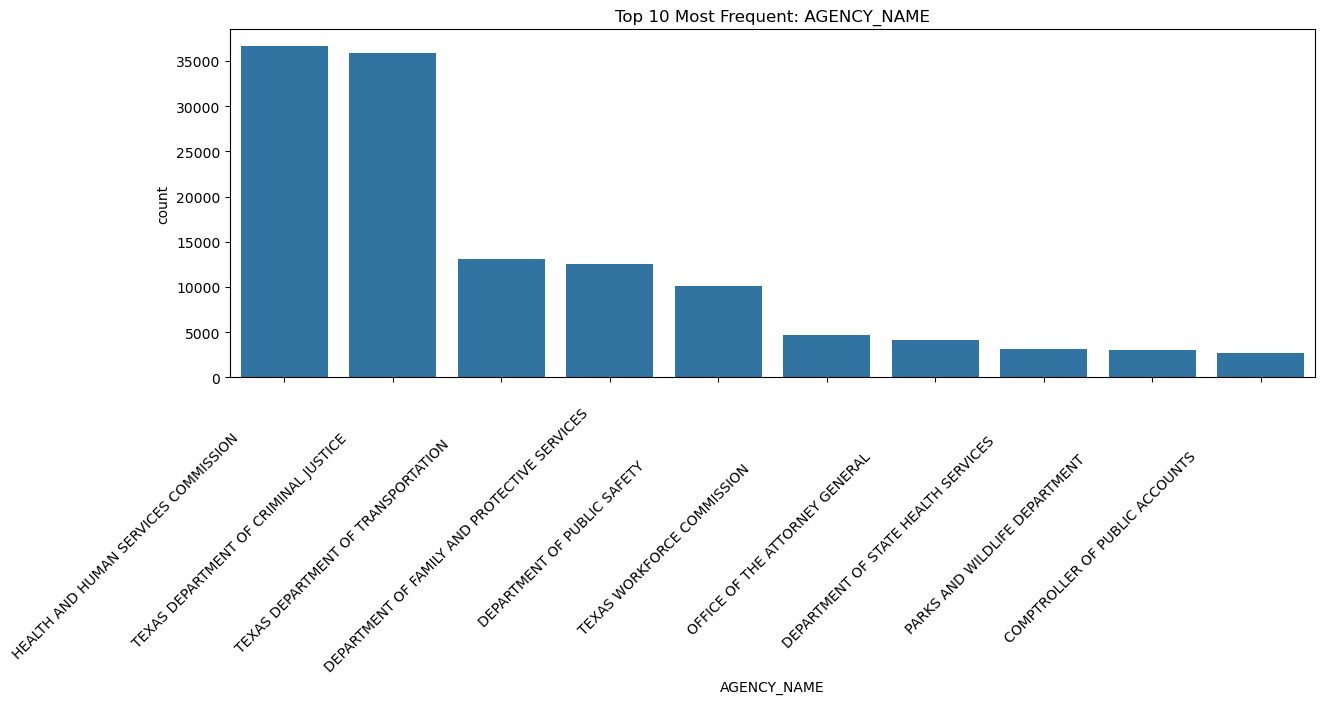

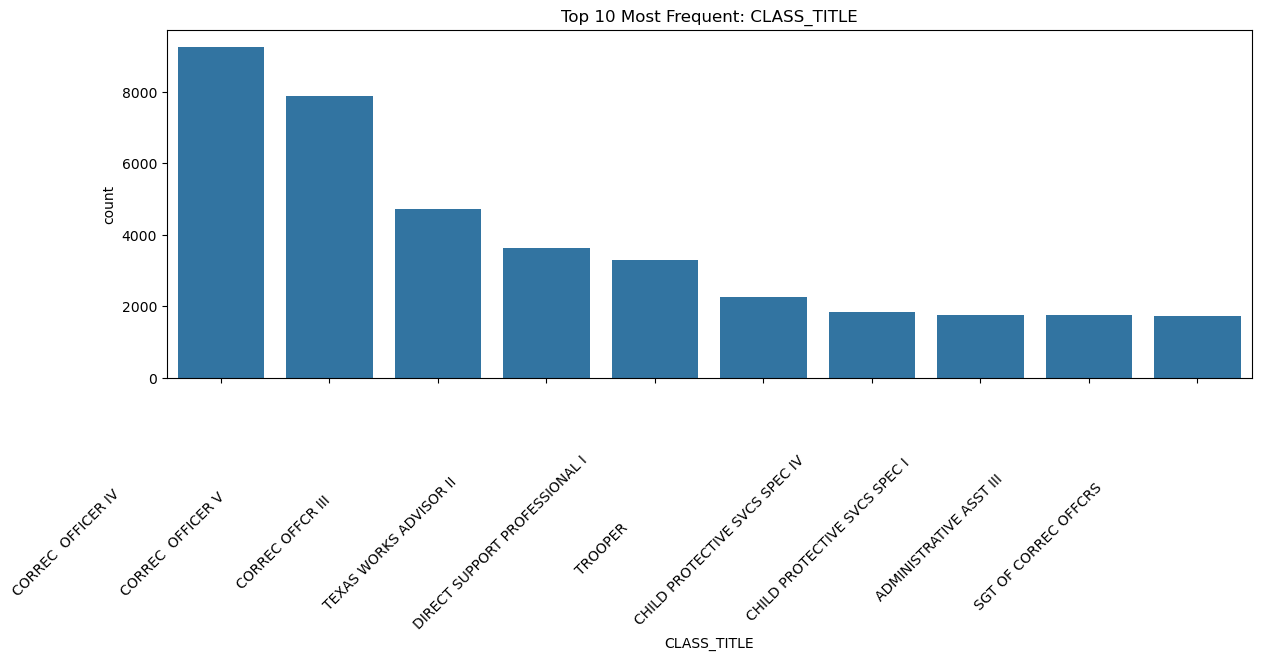

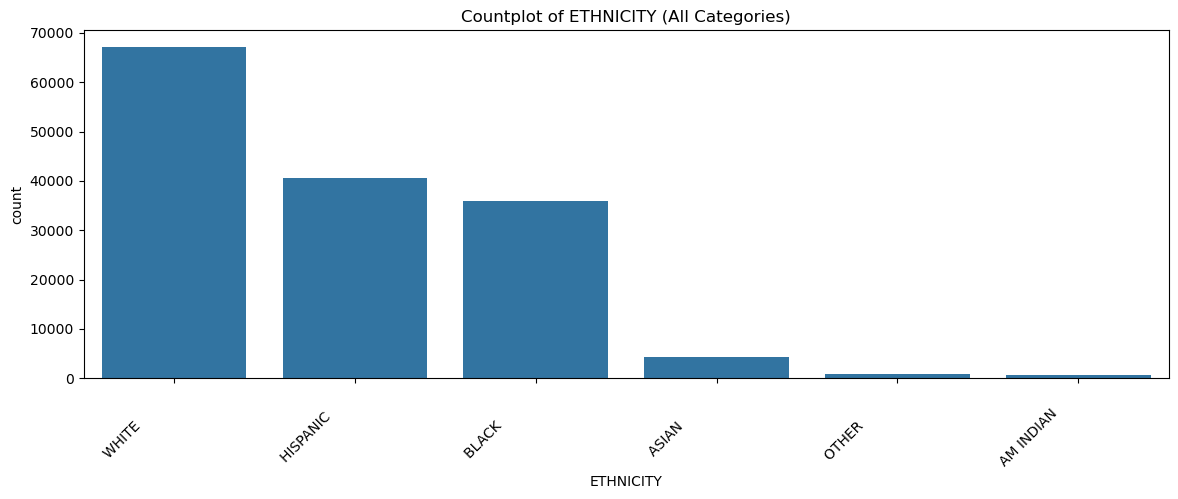

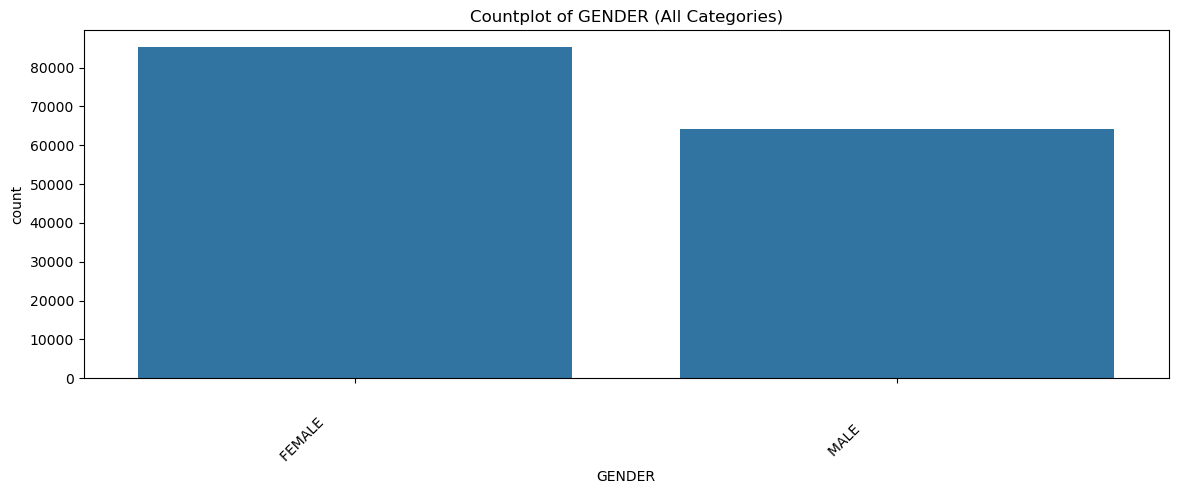

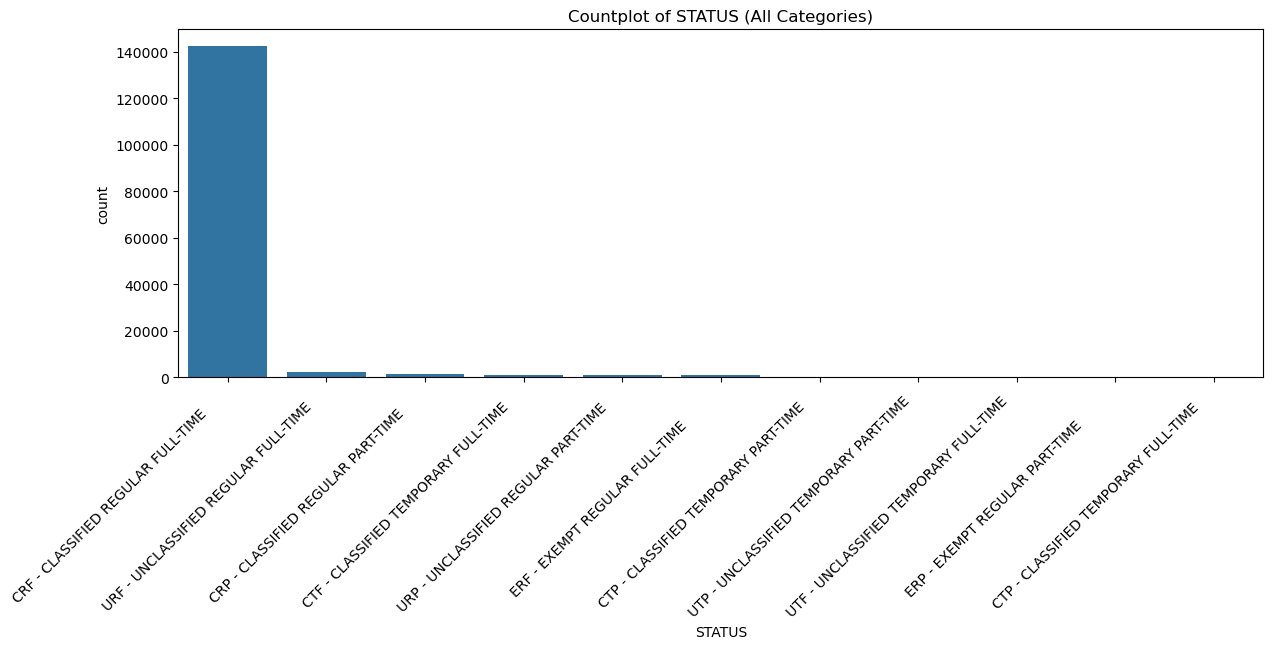

In [22]:
## Countplot for categorical column
categorical_cols = ['AGENCY_NAME', 'CLASS_TITLE', 'ETHNICITY', 'GENDER', 'STATUS']

for col in categorical_cols:
    plt.figure(figsize=(14, 6))  # Bigger size for better spacing

    if col in ['AGENCY_NAME', 'CLASS_TITLE']:
        top_10 = dataset[col].value_counts().nlargest(10).index
        sns.countplot(data=dataset[dataset[col].isin(top_10)], x=col, order=top_10)
        plt.title(f'Top 10 Most Frequent: {col}')
    else:
        sns.countplot(data=dataset, x=col, order=dataset[col].value_counts().index)
        plt.title(f'Countplot of {col} (All Categories)')
    
    plt.xticks(rotation=45, ha='right')  # Rotate and align labels
    plt.subplots_adjust(bottom=0.3)      # Prevent labels from getting cut
    plt.show()

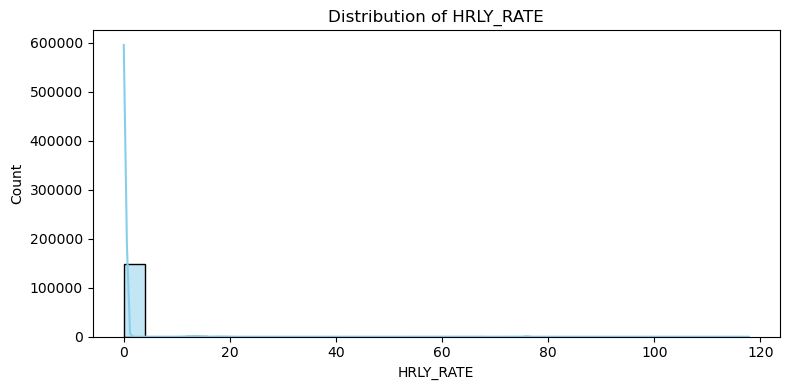

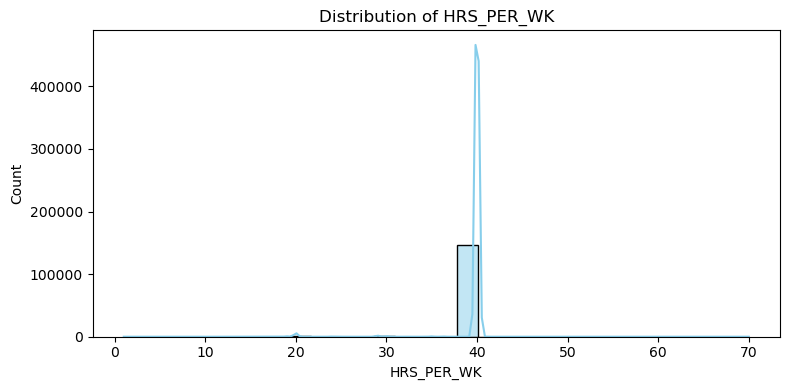

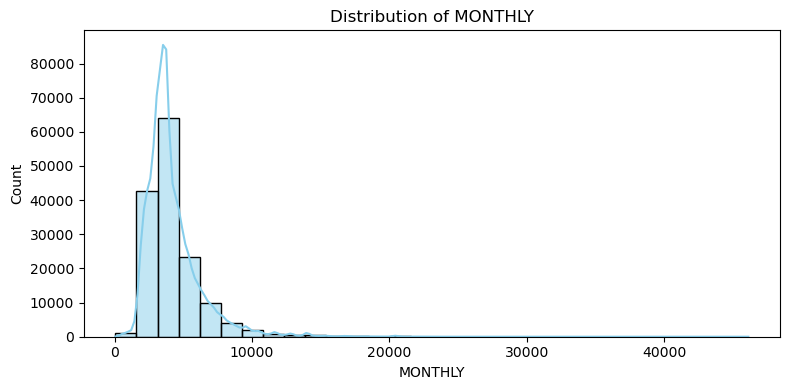

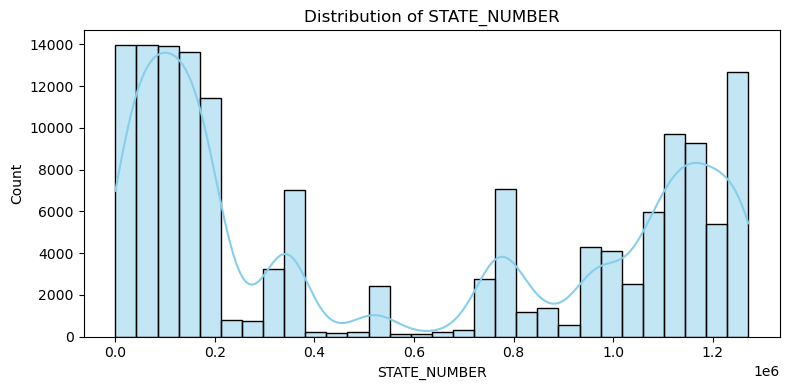

In [23]:
# List of our numerical columns
# histogram for our numericalcolumn  
numerical_cols = ['HRLY_RATE', 'HRS_PER_WK', 'MONTHLY', 'STATE_NUMBER']

# Loop through each numerical column and plot histogram + KDE
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=dataset, x=col, kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

## Univariate Analysis Insights:

- In this section, we performed univariate analysis on both numerical and categorical columns to understand the distribution and nature of the data.


#### Categorical Columns 


**1** . **AGENCY_NAME**:
- We selected the ***top 10 most frequent agency names*** because plotting all agencies was not visually clear.
- Among them, ***Health and Human Services Commission*** and ***Texas Department of Criminal Justice*** have the ***highest*** number of employees (over 35,000 records).
- These two agencies will strongly impact our salary analysis.
- The Parks and Wildlife Department and Comptroller of Public Accounts have the lowest counts in the top 10 list.

**2** . **CLASS_TITLE**: 
- We selected the top 10 most common job roles (CLASS_TITLE) to make the chart easy to read.
- The **top 3 roles** are **CORREC OFFICER IV, V, and III — meaning correction officers** are the most **common** job roles in this dataset.
- Other common roles include **TEXAS WORKS ADVISOR II**, **TROOPER, and CHILD PROTECTIVE SVCS SPEC IV/I**.
- These job roles will have a bigger impact in our salary and compensation analysis.
- There are many unique class titles overall, so we focus on the top 10 only for this univariate plot.

**3** . **ETHINICITY**:
- **Most** employees are **White**, followed by **Hispanic** and **Black** individuals.
- Groups like **Asian**, **Other**, and **American Indian** have much **fewer records**.
- This shows that the dataset is **imbalanced** in ethnicity distribution, which is important to remember in further analysis.
- Ethnicity might affect **salary trends**, so we’ll keep this column in mind for future comparisons.

**4** . **Gender**: The number of female employees is higher compared to male employees.

**5** . **Status**: 
- The majority of employees are in the status: "CRF - CLASSIFIED REGULAR FULL-TIME".
- This category has a very high count, dominating the dataset compared to other status types.
- Other statuses like URF, CRP, CTF, and ERP have very few records in comparison.
- This means most employees in the Texas state government are full-time classified regular staff.
- We should consider this imbalance in later stages like modeling to avoid biased predictions.

#### Numerical Columns

**6** . **HRLY_RATE**: **Most** people get **low** hourly pay. A **few** get very **high** pay, but that’s very rare.

**7** . **Hours Per Week**: 
- Almost everyone works around 40 hours in a week. This is normal full-time work.
- A few work too little or too much, which looks unusual and may need checking.

**8** . **Monthly**:
- Most employees get a monthly salary between 2,000 and 7,000.
- Only a few employees get very high salaries, above 10,000.
- This means more people earn less, and very few earn a lot.

**9** . **State_Number**:
- The chart shows how many employees fall into different ranges of STATE_NUMBER.

**Axis meaning:**
- X-axis (STATE_NUMBER): These are the state ID numbers assigned to employees.
- Y-axis (Count): Shows how many employees have those state numbers.

***Insight***
- There are more employees with lower and higher state numbers.
- Very few employees have mid-range state numbers.
- The count is high at the start and end, but low in the middle.


## Bivariate Analysis 
- Bivariate analysis means studying the relationship between **two variables** — usually, one is the feature (independent variable) and the other is the target (dependent variable).

- In our case, we are comparing each feature with the **target variable `ANNUAL`** to understand how they are related. This helps us find which features may affect the annual salary and are important for model building.


In [27]:
df.head()

,AGENCY,AGENCY_NAME,LAST NAME,FIRST NAME,MI,CLASS_CODE,CLASS_TITLE,ETHNICITY,GENDER,STATUS,...,HRLY_RATE,HRS_PER_WK,MONTHLY,ANNUAL,STATE_NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN


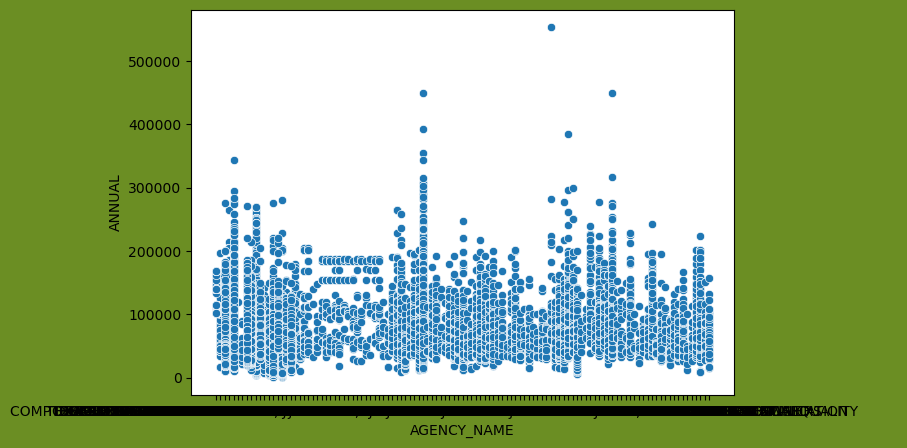

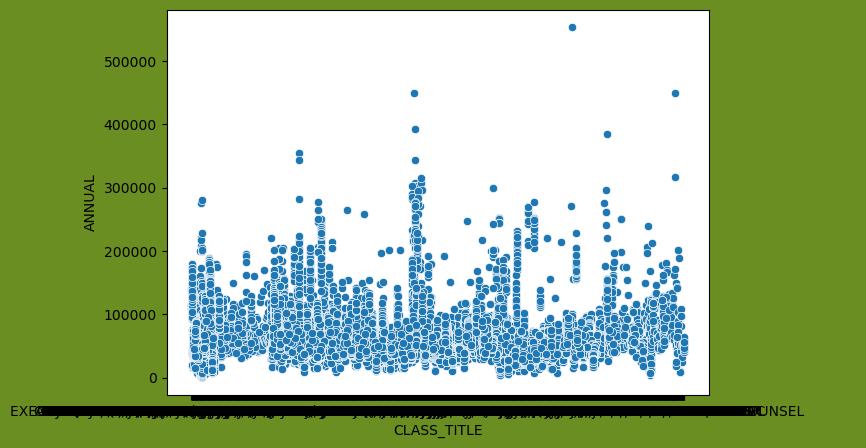

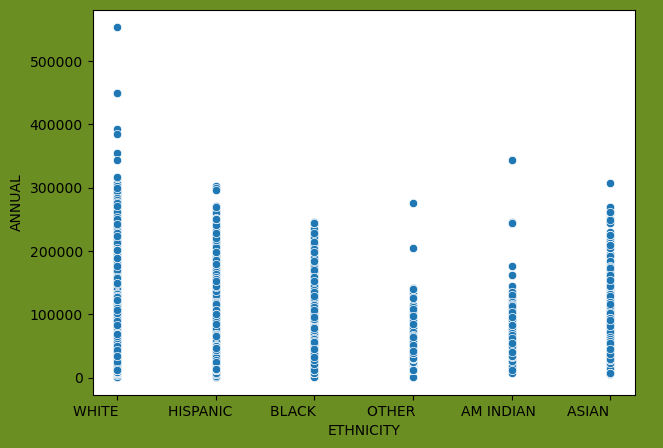

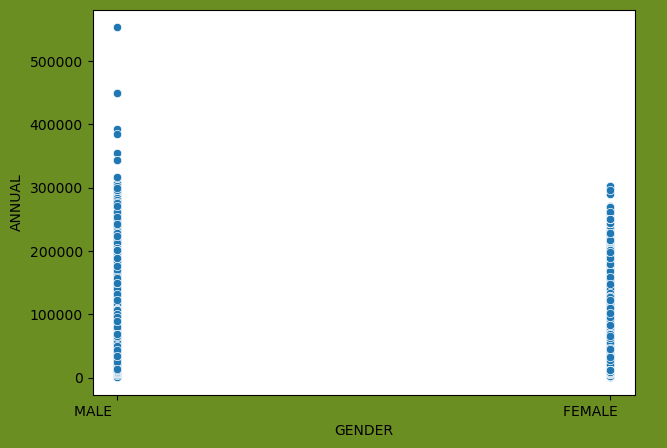

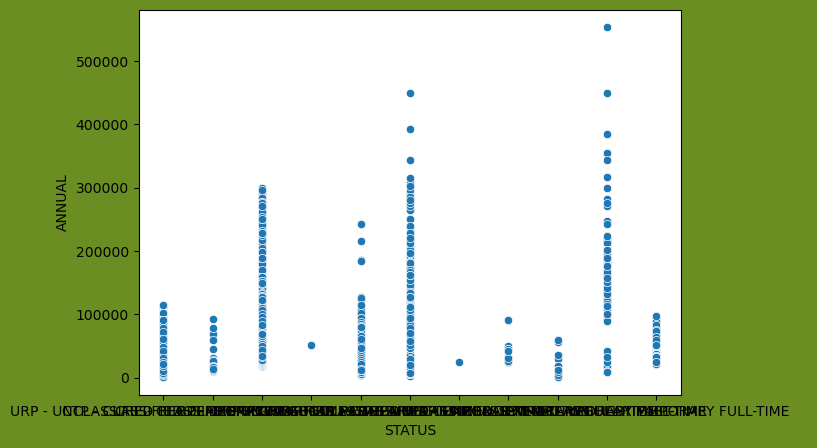

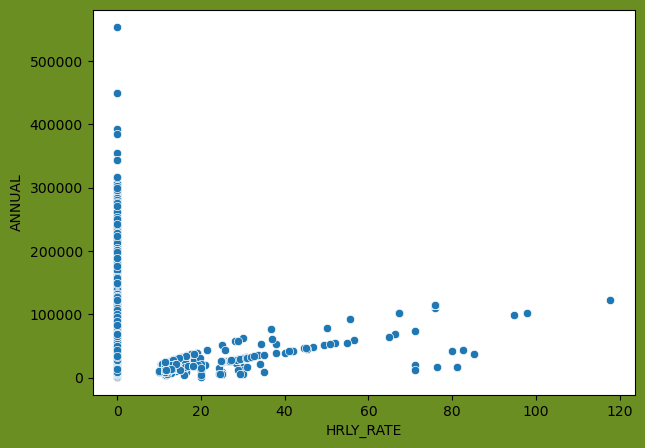

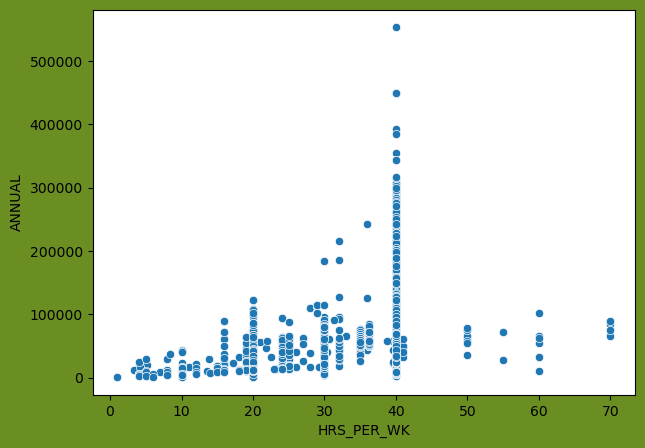

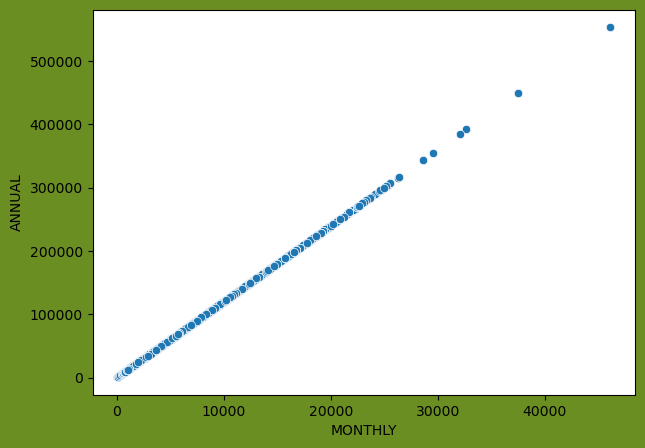

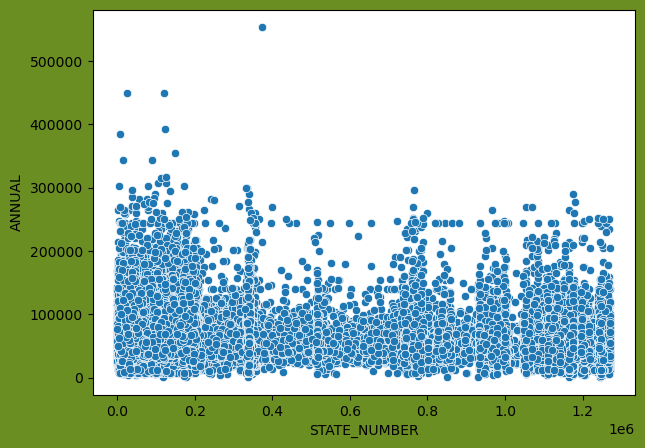

In [28]:
for columns in dataset:
    plt.figure(figsize=(7,5),facecolor="#6B8E23")
    sns.scatterplot(x=columns,y=df.ANNUAL,data=dataset)
    plt.show()   

## Bivariate Analysis Insights  

**1**. ***AGENCY_NAME vs ANNUAL Salary:***
- The majority of employees across all agencies earn between **₹0 and ₹150,000**.
- there is no Trend between **AGENCY_NAME vs ANNUAL Salary.**

**2**. ***CLASS_TITLE vs ANNUAL Salary:***
- Salaries across most job titles are concentrated under ***150,000***
- Certain job titles ***have outliers*** earning ***above 4,00,000***, indicating high-paying positions likely in ***senior or specialized roles***
- Many job titles have a **similar range of salaries**, suggesting standardized pay scales for different roles.

**3**. ***ETHNICITY vs ANNUAL Salary:***
- Most people from all ethnic groups earn less than ***150,000,*** showing a common salary range.
- White and Hispanic people have more individuals earning very ***high salaries*** ***(above ₹400,000)***, likely in top or special jobs.
- Asian, Black, and AM Indian groups also have some ***high earners***, but fewer compared to White and Hispanic groups.
- Overall, salaries look quite ***similar across all groups***, but ***top-paying jobs may not be evenly spread*** among them.

**4**. ***GENDER vs ANNUAL Salary:***
- Most salaries for both males and females are ***below 150,000***.
- Males show more ***high-salary outliers (above 4,00,000)***, indicating more top-paying roles.
- Females have **fewer outliers** in higher salary ranges.
- This suggests a possible gender gap in access to high-paying positions.

**5**. ***HRLY_RATE vs ANNUAL Salary:***
- Most people earn hourly wages between 10 and 40, and their annual salary increases steadily with hourly rate.
- A large number of records show 0 hourly rate, but their annual salaries are very high (up to 550,000) — these are likely fixed annual salaried employees, not paid hourly.
- Beyond ₹70/hr, very few data points exist, and they show scattered annual salaries without a clear trend.

**6**. ***HRS_PER_WK  vs ANNUAL Salary:***
- Most people work **around 40 hours per week**, and this group includes a **wide range of annual salaries**, with some earning **above ₹500,000** — likely full-time employees.
- A large concentration is seen in the **20–40 hrs/week** range, where **salaries gradually increase**.
- People working **less than 20 hours/week** generally earn **lower salaries (under 100,000)** — indicating **part-time work**.
- Some individuals working **50–70 hours/week** still earn **low to moderate salaries**, possibly due to **low hourly pay or unpaid overtime**.
- Overall, **more weekly work hours tend to align with higher salary**, but it’s **not always guaranteed**, suggesting influence of other variables like **job title or compensation type**.

**7** . ***MONTHLY vs ANNUAL Salary***

**Strong Linear Relationship**:
   - The plot shows a perfect straight line, indicating that ANNUAL salary is exactly 12 times the MONTHLY salary.
   - Formula: `ANNUAL = MONTHLY × 12`
**No Major Outliers**:
   - All data points follow the same pattern.
   - No employees earning disproportionately more or less than expected.
**Consistent Pay Structure**:
   - This pattern suggests a standardized salary system, where everyone’s annual income is calculated in the same way, without inconsistencies.

**8** . ***STATE_NUMBER vs ANNUAL Salary***

- **No strong linear relationship observed**  
  The scatter plot shows no clear upward or downward trend between `STATE_NUMBER` and `ANNUAL`. The values are widely scattered.
- **High variance within each state**  
  For each `STATE_NUMBER`, the `ANNUAL` values vary significantly. This suggests a diverse range of income/spending within individual states.
- **Presence of outliers**  
  A few data points exceed ₹500,000 in annual value, indicating the presence of outliers or unusually high records.
- **Dense clustering at lower annual values**  
  Most data points are concentrated in the ₹0–₹100,000 range, indicating a majority of the population falls in this bracket.
- **No state-specific trend**  
  The spread of `ANNUAL` values looks fairly uniform across all `STATE_NUMBER`s, suggesting no particular state dominates in terms of annual value.

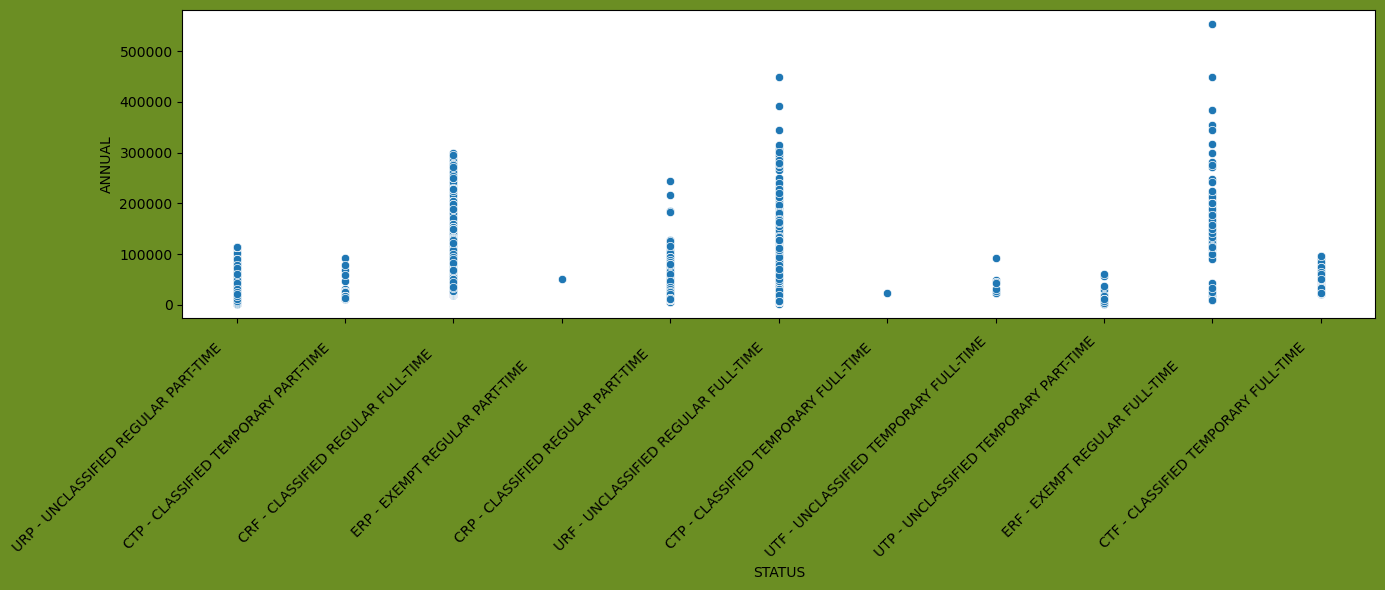

In [30]:
plt.figure(figsize=(14,6), facecolor="#6B8E23")
sns.scatterplot(x='STATUS', y='ANNUAL', data=df)
plt.xticks(rotation=45, ha='right')  # Rotates and aligns x-axis labels
plt.tight_layout()  # Adjusts spacing to avoid cut-off
plt.show()

**9**. ***STATUS vs ANNUAL Salary:***

- ERF – Exempt Regular Full-Time is the only status with salary outliers **above ₹400,000,** suggesting highly paid roles.
- **CRF and URF** show a **good** spread of salaries, mostly around **300,000**.
- **Part-time and temporary roles (like URP, CTP, CTF)** have **lower** salary ranges, mostly between **10,0000 to ₹150,000**.

In [32]:
df.loc[df['ANNUAL'] > 400000] ## This step is usually done for deeper investigation

,AGENCY,AGENCY_NAME,LAST NAME,FIRST NAME,MI,CLASS_CODE,CLASS_TITLE,ETHNICITY,GENDER,STATUS,...,HRLY_RATE,HRS_PER_WK,MONTHLY,ANNUAL,STATE_NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
14793,323,TEACHER RETIREMENT SYSTEM ...,AUBY,JASE,R,C204,CHIEF INVESTMENT OFFICER ...,WHITE,MALE,ERF - EXEMPT REGULAR FULL-TIME,...,0.0,40.0,37500.0,450000.0,121522,NaN,NaN,NaN,NaN,NaN
83851,542,CANCER PREVENTION AND RESEARCH INSTITUTE OF TE...,WILLSON,JAMES,,C542,CHIEF SCIENTIFIC OFFICER ...,WHITE,MALE,ERF - EXEMPT REGULAR FULL-TIME,...,0.0,40.0,46125.0,553500.0,372291,NaN,NaN,NaN,NaN,NaN
144232,327,EMPLOYEES RETIREMENT SYSTEM ...,TULL,CHARLES,T,D136,DIRECTOR OF INVESTMENTS ...,WHITE,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,...,0.0,40.0,37500.0,450000.0,24680,NaN,NaN,NaN,NaN,NaN


## Multivariate analysis

- Multivariate analysis is the process of analyzing data that involves multiple variables to see how they are related or how they affect each other.

<Figure size 2000x2000 with 0 Axes>

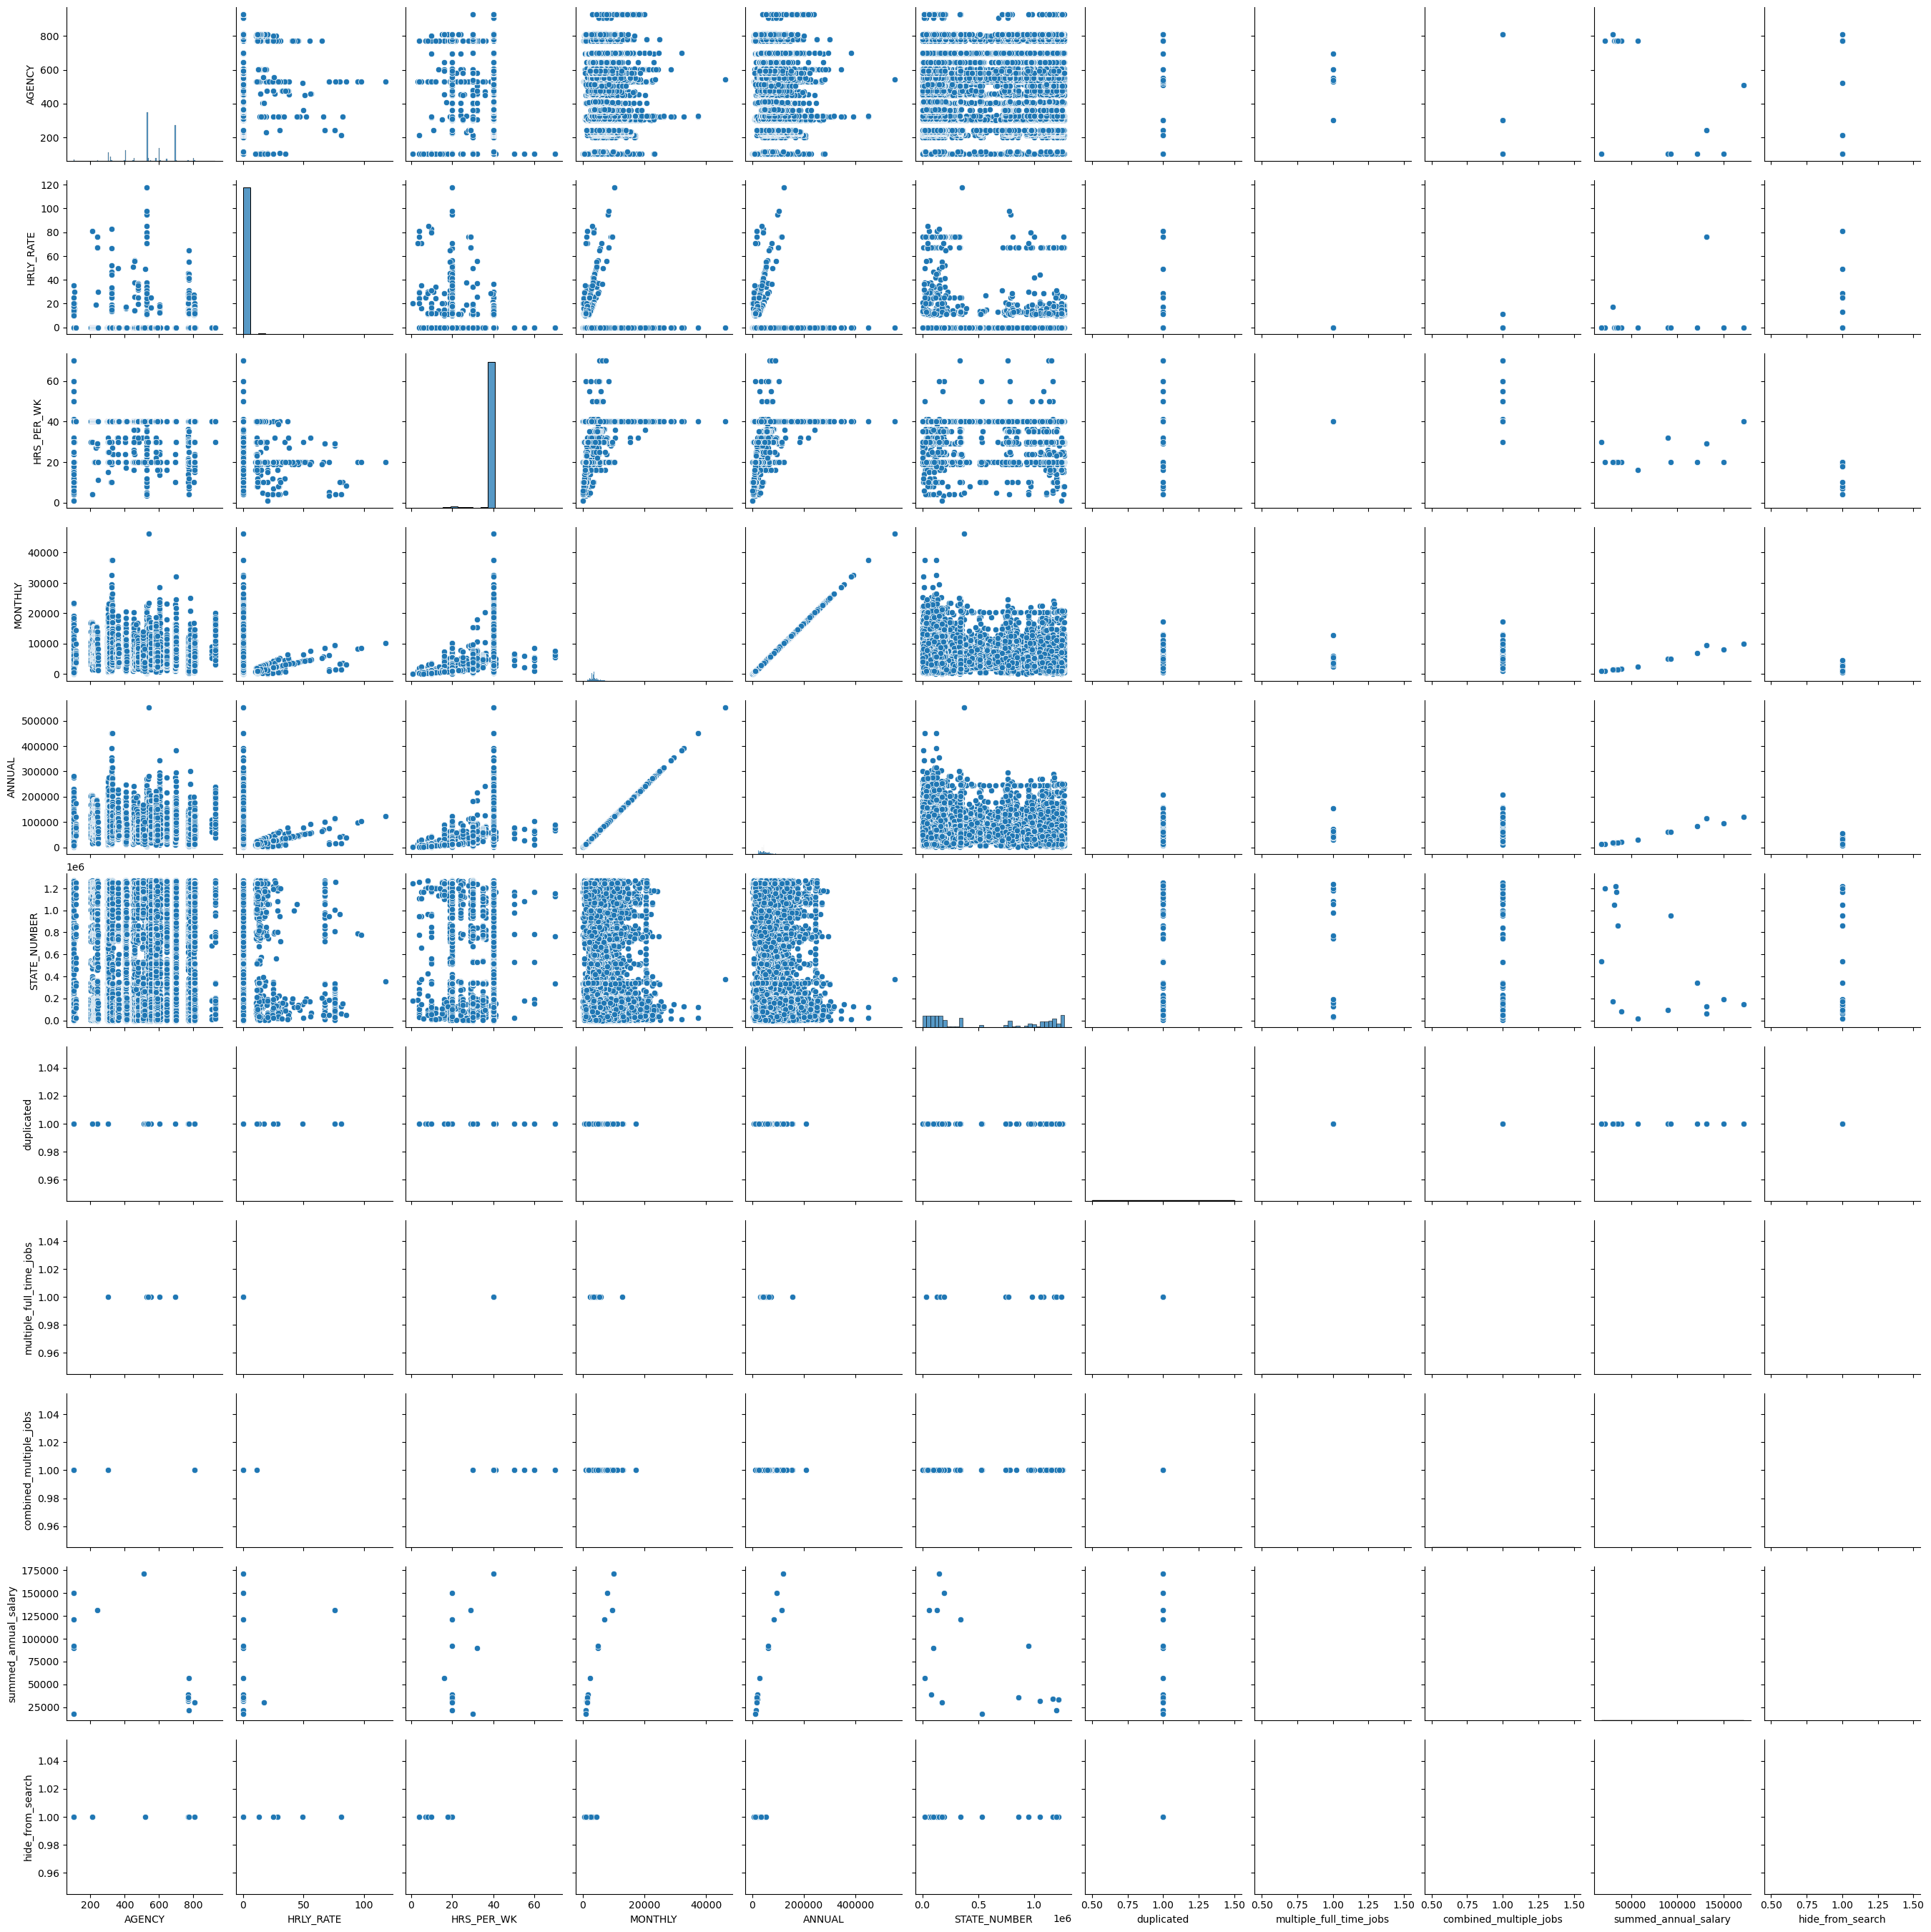

In [34]:
plt.figure(figsize=(20,20)) 
sns.pairplot(df)            
plt.show()

In [35]:
## To filter out only the numeric columns (like int, float) from the given DataFrame.
df1=df.select_dtypes(include=['number'])
df1

,AGENCY,HRLY_RATE,HRS_PER_WK,MONTHLY,ANNUAL,STATE_NUMBER,multiple_full_time_jobs,summed_annual_salary
0,241,75.96150,29.0,9545.82,114549.84,127717,NaN,131407.08
1,212,81.04454,4.0,1404.77,16857.24,127717,NaN,NaN
2,241,75.96150,29.0,9545.82,114549.84,59115,NaN,131407.08
3,212,81.04453,4.0,1404.77,16857.24,59115,NaN,NaN
4,696,0.00000,40.0,3284.27,39411.24,165030,1.0,NaN
...,...,...,...,...,...,...,...,...
149476,809,0.00000,40.0,2899.00,34788.00,770781,NaN,NaN
149477,809,0.00000,40.0,5500.00,66000.00,847431,NaN,NaN
149478,809,12.93000,20.0,1120.60,13447.20,34266,NaN,NaN
149479,809,0.00000,40.0,5744.16,68929.92,123490,NaN,NaN


In [36]:
df1.columns ##viewing the columns 

Index(['AGENCY', 'HRLY_RATE', 'HRS_PER_WK', 'MONTHLY', 'ANNUAL',
       'STATE_NUMBER', 'multiple_full_time_jobs', 'summed_annual_salary'],
      dtype='object')

In [37]:
new_data=df[['AGENCY', 'HRLY_RATE', 'HRS_PER_WK', 'MONTHLY', 'ANNUAL',
       'STATE_NUMBER', 'multiple_full_time_jobs', 'summed_annual_salary']]

In [38]:
new_data

,AGENCY,HRLY_RATE,HRS_PER_WK,MONTHLY,ANNUAL,STATE_NUMBER,multiple_full_time_jobs,summed_annual_salary
0,241,75.96150,29.0,9545.82,114549.84,127717,NaN,131407.08
1,212,81.04454,4.0,1404.77,16857.24,127717,NaN,NaN
2,241,75.96150,29.0,9545.82,114549.84,59115,NaN,131407.08
3,212,81.04453,4.0,1404.77,16857.24,59115,NaN,NaN
4,696,0.00000,40.0,3284.27,39411.24,165030,1.0,NaN
...,...,...,...,...,...,...,...,...
149476,809,0.00000,40.0,2899.00,34788.00,770781,NaN,NaN
149477,809,0.00000,40.0,5500.00,66000.00,847431,NaN,NaN
149478,809,12.93000,20.0,1120.60,13447.20,34266,NaN,NaN
149479,809,0.00000,40.0,5744.16,68929.92,123490,NaN,NaN


## Plotting a Correlation Heatmap
## Purpose:
- **To visually analyze how different numeric features are correlated with each other in a dataset.**

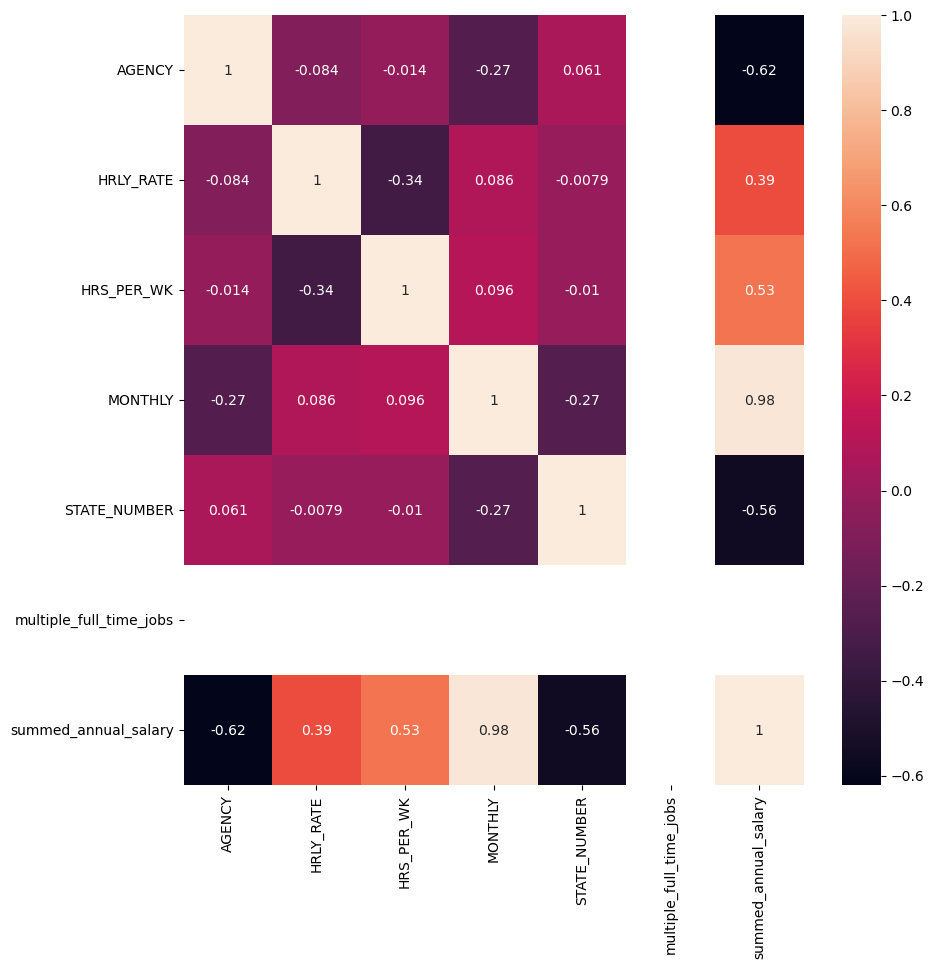

In [40]:
plt.figure(figsize=(10,10), facecolor='white')
sns.heatmap(data=new_data.drop(['ANNUAL'], axis=1).corr(), annot=True)
plt.show()

### Insights From Your Heatmap
- **1. summed_annual_salary has:**
Very **strong positive** correlation **with MONTHLY (0.98)**, indicating a strong linear relationship between the two variables
- This means: As **MONTHLY salary** **increases**, the **total annual salary also increases**.
- This is expected because annual salary = **monthly × 12 in many jobs**.

- **Moderate positive correlation with HRLY_RATE (0.39)**
- So: If the **hourly rate increases**, **total salary increases** — but not as strongly as monthly.

- **Moderate positive correlation with HRS_PER_WK (0.39)**
- This means: People who work **more hours per week** tend to have **higher annual salaries**.

- **Negative correlation with AGENCY (-0.62)**
- This might mean: Certain agencies are associated with lower annual salaries, depending on how AGENCY was encoded numerically.

- **Negative correlation with STATE_NUMBER (-0.56)**
- So: **State location might influence salary** — some states pay **less on average.**

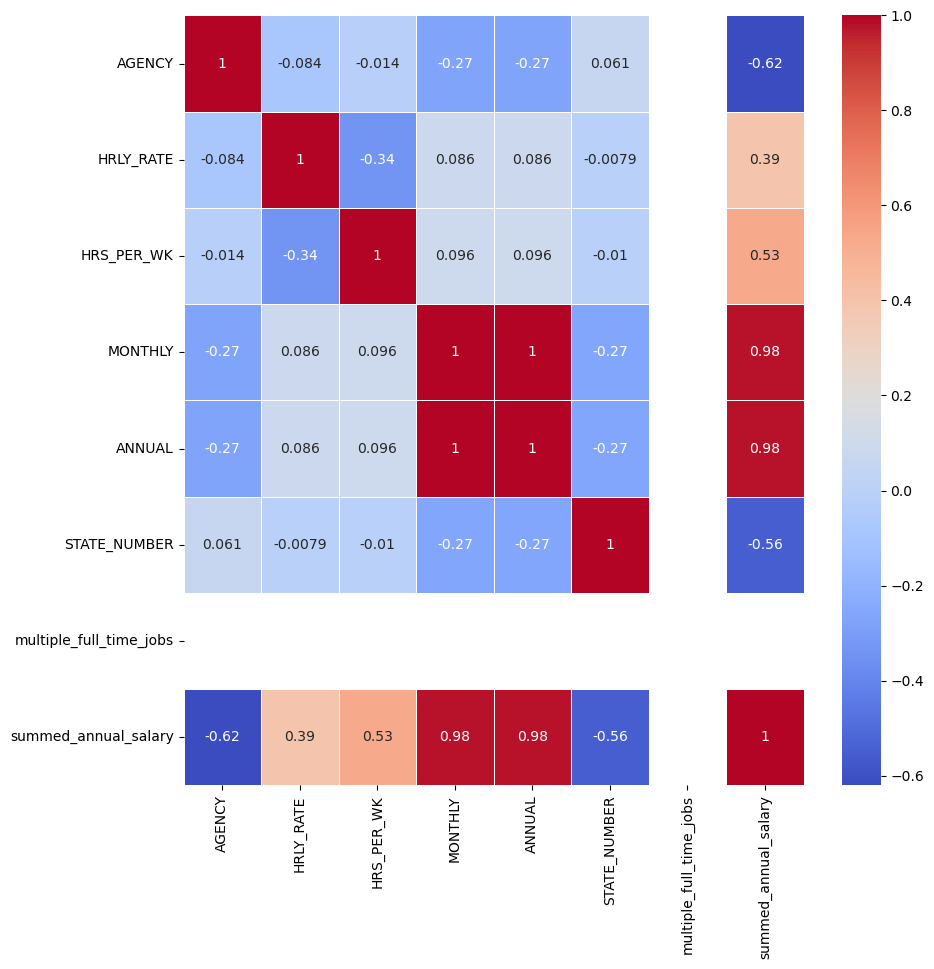

In [42]:
plt.figure(figsize=(10, 10), facecolor='white')  # Set figure size and background color
sns.heatmap(new_data.corr(), annot=True, cmap="coolwarm", linewidths=0.5)  
plt.show()

### **1. `summed_annual_salary` has:**

- **Very strong positive correlation with `MONTHLY` (0.98)**  
  ➤ This indicates a strong linear relationship between the two variables.  
  ➤ As **monthly salary increases**, the **total annual salary also increases**.  
  ➤ This is expected because annual salary = **monthly × 12** in many jobs.

---

- **Very strong positive correlation with `ANNUAL` (0.96)**  
  ➤ This suggests the column `ANNUAL` is either part of the total salary or calculated similarly.  
  ➤ So, **ANNUAL and summed_annual_salary are almost directly linked**.

---

- **Moderate positive correlation with `HRS_PER_WK` (0.53)**  
  ➤ This means: **People who work more hours per week tend to earn higher annual salaries**.  
  ➤ Weekly effort appears to influence total pay.

---

- **Moderate positive correlation with `HRLY_RATE` (0.39)**  
  ➤ So: If the **hourly rate increases**, the **total salary also increases** — though not as strongly as monthly.

---

- **Moderate positive correlation with `STATE_NUMBER` (0.56)**  
  ➤ This indicates that **location (state) plays a role in salary**.  
  ➤ Some states are associated with **higher average salaries**.

---

- **Strong negative correlation with `AGENCY` (-0.62)**  
  ➤ This might mean: **Certain agencies are linked to lower annual salaries**, depending on how `AGENCY` is encoded.  
  ➤ May require checking whether specific agency codes consistently represent lower-paying employers.

## Data Preprocessing
- **Data Preprocessing is the cleaning and preparing of raw data before using it for analysis or machine learning.**

In [45]:
df.isnull().sum()

AGENCY                          0
AGENCY_NAME                     0
LAST NAME                       0
FIRST NAME                      0
MI                              0
CLASS_CODE                      0
CLASS_TITLE                     0
ETHNICITY                       0
GENDER                          0
STATUS                          0
EMPLOY_DATE                     0
HRLY_RATE                       0
HRS_PER_WK                      0
MONTHLY                         0
ANNUAL                          0
STATE_NUMBER                    0
duplicated                 149338
multiple_full_time_jobs    149467
combined_multiple_jobs     149384
summed_annual_salary       149465
hide_from_search           149465
dtype: int64

- **Last five columns have more nan value in data set**
- **Drop last five columns**

In [47]:
df.shape

(149481, 21)

In [48]:
df.columns

Index(['AGENCY', 'AGENCY_NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS_CODE',
       'CLASS_TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY_DATE',
       'HRLY_RATE', 'HRS_PER_WK', 'MONTHLY', 'ANNUAL', 'STATE_NUMBER',
       'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search'],
      dtype='object')

In [49]:
df.drop(['duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search'], axis=1, inplace=True)

In [50]:
df

,AGENCY,AGENCY_NAME,LAST NAME,FIRST NAME,MI,CLASS_CODE,CLASS_TITLE,ETHNICITY,GENDER,STATUS,EMPLOY_DATE,HRLY_RATE,HRS_PER_WK,MONTHLY,ANNUAL,STATE_NUMBER
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,114549.84,59115
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,16857.24,59115
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24,165030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,10/30/17,0.00000,40.0,2899.00,34788.00,770781
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,07/13/15,0.00000,40.0,5500.00,66000.00,847431
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,10/15/12,12.93000,20.0,1120.60,13447.20,34266
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/22/89,0.00000,40.0,5744.16,68929.92,123490


In [51]:
## checking for duplicate rows
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
149476    False
149477    False
149478    False
149479    False
149480    False
Length: 149481, dtype: bool

In [52]:
df.duplicated().sum()

0

## Data Transformation
- ***Data Transformation means changing the format, structure, or values of your data to make it more useful or readable — especially before analysis or building a machine learning model.***

#### Why Do We Use Data Transformation?
- Because raw data is often not in the right shape or scale to get accurate results. We transform it so that:
- All features are on a similar scale
- Text is converted into numbers
- Skewed data becomes more normal
- Data becomes easier to analyze or model

In [54]:
df.select_dtypes(include=['number']) ## print numerical columns

,AGENCY,HRLY_RATE,HRS_PER_WK,MONTHLY,ANNUAL,STATE_NUMBER
0,241,75.96150,29.0,9545.82,114549.84,127717
1,212,81.04454,4.0,1404.77,16857.24,127717
2,241,75.96150,29.0,9545.82,114549.84,59115
3,212,81.04453,4.0,1404.77,16857.24,59115
4,696,0.00000,40.0,3284.27,39411.24,165030
...,...,...,...,...,...,...
149476,809,0.00000,40.0,2899.00,34788.00,770781
149477,809,0.00000,40.0,5500.00,66000.00,847431
149478,809,12.93000,20.0,1120.60,13447.20,34266
149479,809,0.00000,40.0,5744.16,68929.92,123490


In [55]:
df.select_dtypes(include=['object'])## print str columns

,AGENCY_NAME,LAST NAME,FIRST NAME,MI,CLASS_CODE,CLASS_TITLE,ETHNICITY,GENDER,STATUS,EMPLOY_DATE
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88
1,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20
3,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20
...,...,...,...,...,...,...,...,...,...,...
149476,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,10/30/17
149477,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,07/13/15
149478,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,10/15/12
149479,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/22/89


### Data Cleaning and One-Hot Encoding Explained

In [57]:
# Clean column names
df.columns = df.columns.str.strip().str.upper().str.replace(" ", "_")

#### Clean Column Names
- Removes spaces from column names
- Converts names to UPPERCASE
- Replaces spaces with underscores `_`
- ✅ This makes it easier to refer to columns in code.

In [59]:
# Clean the 'AGENCY_NAME' column
df['AGENCY_NAME'] = df['AGENCY_NAME'].astype(str).str.strip().str.upper()

#### Clean the 'AGENCY_NAME' Column
- Makes all text UPPERCASE
- Strips unwanted spaces from each value
- ✅ Helps standardize values before encoding or analysis.

#### One-Hot Encode 'AGENCY_NAME'
- Converts each unique agency name into a new column with 0/1 values
- ✅ This is needed because ML models can't understand text directly.

#### Save and View the Final Data
- Saves the cleaned and encoded DataFrame to a new CSV file
- Prints the first 5 rows to inspect the result

In [62]:
# One-hot encode with dtype=int
df = pd.get_dummies(df, columns=['AGENCY_NAME'], dtype=int)

# Save or inspect
df.to_csv("salary_encoded.csv", index=False)
print(df.head())

   AGENCY                       LAST_NAME                      FIRST_NAME MI  \
0     241  RUCKER                          MORTON                          V   
1     212  RUCKER                          MORTON                          V   
2     241  SPECIA JR                       JOHN                            J   
3     212  SPECIA JR                       JOHN                            J   
4     696  ONTIVEROS                       ESTHER                              

  CLASS_CODE                                        CLASS_TITLE  \
0   JD25      JUDGE, RETIRED                                ...   
1   3524      GENERAL COUNSEL IV                            ...   
2   JD25      JUDGE, RETIRED                                ...   
3   3524      GENERAL COUNSEL IV                            ...   
4   4504      CORREC  OFFICER IV                            ...   

         ETHNICITY           GENDER                                    STATUS  \
0  WHITE            MALE           

In [63]:
df.head()

,AGENCY,LAST_NAME,FIRST_NAME,MI,CLASS_CODE,CLASS_TITLE,ETHNICITY,GENDER,STATUS,EMPLOY_DATE,...,AGENCY_NAME_TEXAS MILITARY DEPARTMENT,AGENCY_NAME_TEXAS PUBLIC FINANCE AUTHORITY,AGENCY_NAME_TEXAS RACING COMMISSION,AGENCY_NAME_TEXAS VETERANS COMMISSION,AGENCY_NAME_TEXAS WORKFORCE COMMISSION,AGENCY_NAME_THIRD COURT OF APPEALS DISTRICT,AGENCY_NAME_THIRTEENTH COURT OF APPEALS DISTRICT,AGENCY_NAME_TREASURY SAFEKEEPING TRUST COMPANY,AGENCY_NAME_TWELFTH COURT OF APPEALS DISTRICT,AGENCY_NAME_WATER DEVELOPMENT BOARD
0,241,RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,...,0,0,0,0,0,0,0,0,0,0
1,212,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,...,0,0,0,0,0,0,0,0,0,0
2,241,SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,...,0,0,0,0,0,0,0,0,0,0
3,212,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,...,0,0,0,0,0,0,0,0,0,0
4,696,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,...,0,0,0,0,0,0,0,0,0,0


In [64]:
df.columns

Index(['AGENCY', 'LAST_NAME', 'FIRST_NAME', 'MI', 'CLASS_CODE', 'CLASS_TITLE',
       'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY_DATE',
       ...
       'AGENCY_NAME_TEXAS MILITARY DEPARTMENT',
       'AGENCY_NAME_TEXAS PUBLIC FINANCE AUTHORITY',
       'AGENCY_NAME_TEXAS RACING COMMISSION',
       'AGENCY_NAME_TEXAS VETERANS COMMISSION',
       'AGENCY_NAME_TEXAS WORKFORCE COMMISSION',
       'AGENCY_NAME_THIRD COURT OF APPEALS DISTRICT',
       'AGENCY_NAME_THIRTEENTH COURT OF APPEALS DISTRICT',
       'AGENCY_NAME_TREASURY SAFEKEEPING TRUST COMPANY',
       'AGENCY_NAME_TWELFTH COURT OF APPEALS DISTRICT',
       'AGENCY_NAME_WATER DEVELOPMENT BOARD'],
      dtype='object', length=128)

In [65]:
df["GENDER"].value_counts()

GENDER
FEMALE             85328
MALE               64153
Name: count, dtype: int64

### Gender Column Cleaning + One-Hot Encoding

1. **Clean column names**
   - Remove extra spaces
   - Convert all names to UPPERCASE
   - Replace spaces with underscores `_`
   - ✅ This avoids errors while writing code

2. **Clean the 'GENDER' column**
   - Convert values to uppercase
   - Remove extra spaces
   - ✅ Ensures values like "Male", " MALE ", and "male" are treated the same

3. **One-hot encode the 'GENDER' column**
   - Converts categorical values into separate numeric columns
   - Example: `"MALE"` and `"FEMALE"` become columns like:
     - `GENDER_MALE`: 1 or 0
     - `GENDER_FEMALE`: 1 or 0
   - ✅ Needed because ML models can’t work with text

4. **Save and View**
   - Saves the cleaned and encoded data as `salary_encoded.csv`
   - Prints the first few rows using `df.head()`

In [67]:
# Clean column names
df.columns = df.columns.str.strip().str.upper().str.replace(" ", "_")

# Clean the 'GENDER' column
df['GENDER'] = df['GENDER'].astype(str).str.strip().str.upper()

# One-hot encode with dtype=int
df = pd.get_dummies(df, columns=['GENDER'], dtype=int)

# Save or inspect
df.to_csv("salary_encoded.csv", index=False)
print(df.head())

   AGENCY                       LAST_NAME                      FIRST_NAME MI  \
0     241  RUCKER                          MORTON                          V   
1     212  RUCKER                          MORTON                          V   
2     241  SPECIA JR                       JOHN                            J   
3     212  SPECIA JR                       JOHN                            J   
4     696  ONTIVEROS                       ESTHER                              

  CLASS_CODE                                        CLASS_TITLE  \
0   JD25      JUDGE, RETIRED                                ...   
1   3524      GENERAL COUNSEL IV                            ...   
2   JD25      JUDGE, RETIRED                                ...   
3   3524      GENERAL COUNSEL IV                            ...   
4   4504      CORREC  OFFICER IV                            ...   

         ETHNICITY                                    STATUS EMPLOY_DATE  \
0  WHITE            URP - UNCLASSIFIED R

In [68]:
df.head()

,AGENCY,LAST_NAME,FIRST_NAME,MI,CLASS_CODE,CLASS_TITLE,ETHNICITY,STATUS,EMPLOY_DATE,HRLY_RATE,...,AGENCY_NAME_TEXAS_RACING_COMMISSION,AGENCY_NAME_TEXAS_VETERANS_COMMISSION,AGENCY_NAME_TEXAS_WORKFORCE_COMMISSION,AGENCY_NAME_THIRD_COURT_OF_APPEALS_DISTRICT,AGENCY_NAME_THIRTEENTH_COURT_OF_APPEALS_DISTRICT,AGENCY_NAME_TREASURY_SAFEKEEPING_TRUST_COMPANY,AGENCY_NAME_TWELFTH_COURT_OF_APPEALS_DISTRICT,AGENCY_NAME_WATER_DEVELOPMENT_BOARD,GENDER_FEMALE,GENDER_MALE
0,241,RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,...,0,0,0,0,0,0,0,0,0,1
1,212,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,...,0,0,0,0,0,0,0,0,0,1
2,241,SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,...,0,0,0,0,0,0,0,0,0,1
3,212,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,...,0,0,0,0,0,0,0,0,0,1
4,696,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,...,0,0,0,0,0,0,0,0,1,0


In [69]:
df["ETHNICITY"].value_counts()

ETHNICITY
WHITE              67142
HISPANIC           40585
BLACK              35853
ASIAN               4268
OTHER                921
AM INDIAN            712
Name: count, dtype: int64

###  Ethnicity Column Cleaning + One-Hot Encoding


1. **Clean column names**
   - Remove leading/trailing spaces
   - Convert names to UPPERCASE
   - Replace spaces with underscores (`_`)
   - ✅ Makes columns easier to work with in code

2. **Clean the 'ETHNICITY' column**
   - Convert text to UPPERCASE
   - Strip unwanted spaces
   - ✅ Makes all values uniform (like "white", " White ", "WHITE" → "WHITE")

3. **One-hot encode the 'ETHNICITY' column**
   - Creates separate columns for each unique ethnicity
   - Example: `"WHITE"`, `"ASIAN"` → `ETHNICITY_WHITE`, `ETHNICITY_ASIAN`
   - ✅ Converts text data into numbers (0/1), needed for ML models

4. **Save and View**
   - Save result as `salary_encoded.csv`
   - Use `df.head()` to view first 5 rows

In [71]:
# Clean column names
df.columns = df.columns.str.strip().str.upper().str.replace(" ", "_")

# Clean the 'ETHNICITY' column
df['ETHNICITY'] = df['ETHNICITY'].astype(str).str.strip().str.upper()

# One-hot encode with dtype=int
df = pd.get_dummies(df, columns=['ETHNICITY'], dtype=int)

# Save or inspect
df.to_csv("salary_encoded.csv", index=False)
print(df.head())

   AGENCY                       LAST_NAME                      FIRST_NAME MI  \
0     241  RUCKER                          MORTON                          V   
1     212  RUCKER                          MORTON                          V   
2     241  SPECIA JR                       JOHN                            J   
3     212  SPECIA JR                       JOHN                            J   
4     696  ONTIVEROS                       ESTHER                              

  CLASS_CODE                                        CLASS_TITLE  \
0   JD25      JUDGE, RETIRED                                ...   
1   3524      GENERAL COUNSEL IV                            ...   
2   JD25      JUDGE, RETIRED                                ...   
3   3524      GENERAL COUNSEL IV                            ...   
4   4504      CORREC  OFFICER IV                            ...   

                                     STATUS EMPLOY_DATE  HRLY_RATE  \
0  URP - UNCLASSIFIED REGULAR PART-TIME       

In [72]:
df.head()

,AGENCY,LAST_NAME,FIRST_NAME,MI,CLASS_CODE,CLASS_TITLE,STATUS,EMPLOY_DATE,HRLY_RATE,HRS_PER_WK,...,AGENCY_NAME_TWELFTH_COURT_OF_APPEALS_DISTRICT,AGENCY_NAME_WATER_DEVELOPMENT_BOARD,GENDER_FEMALE,GENDER_MALE,ETHNICITY_AM INDIAN,ETHNICITY_ASIAN,ETHNICITY_BLACK,ETHNICITY_HISPANIC,ETHNICITY_OTHER,ETHNICITY_WHITE
0,241,RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,...,0,0,0,1,0,0,0,0,0,1
1,212,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,...,0,0,0,1,0,0,0,0,0,1
2,241,SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,...,0,0,0,1,0,0,0,0,0,1
3,212,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,...,0,0,0,1,0,0,0,0,0,1
4,696,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,...,0,0,1,0,0,0,0,1,0,0


### CLASS_TITLE Column Cleaning + One-Hot Encoding

1. **Clean column names**
   - Removes leading/trailing spaces
   - Converts all column names to UPPERCASE
   - Replaces spaces with underscores (`_`)
   - ✅ Makes column names easier to access in code

2. **Clean the 'CLASS_TITLE' column**
   - Converts values to uppercase
   - Removes extra spaces
   - ✅ Standardizes job titles (e.g., "manager", "Manager ", "MANAGER" → "MANAGER")

3. **One-hot encode 'CLASS_TITLE'**
   - Creates new columns like `CLASS_TITLE_MANAGER`, `CLASS_TITLE_ANALYST` etc.
   - Uses 1 or 0 to show if the row belongs to that job title
   - ✅ Useful for machine learning models that need numeric data

4. **Save & Inspect the Data**
   - Saves the updated dataset to `salary_encoded.csv`
   - Uses `df.head()` to display the first 5 rows


In [74]:
# Clean column names
df.columns = df.columns.str.strip().str.upper().str.replace(" ", "_")

# Clean the 'CLASS_TITLE' column
df['CLASS_TITLE'] = df['CLASS_TITLE'].astype(str).str.strip().str.upper()

# One-hot encode with dtype=int
df = pd.get_dummies(df, columns=['CLASS_TITLE'], dtype=int)

# Save or inspect
df.to_csv("salary_encoded.csv", index=False)
print(df.head())

   AGENCY                       LAST_NAME                      FIRST_NAME MI  \
0     241  RUCKER                          MORTON                          V   
1     212  RUCKER                          MORTON                          V   
2     241  SPECIA JR                       JOHN                            J   
3     212  SPECIA JR                       JOHN                            J   
4     696  ONTIVEROS                       ESTHER                              

  CLASS_CODE                                    STATUS EMPLOY_DATE  HRLY_RATE  \
0   JD25      URP - UNCLASSIFIED REGULAR PART-TIME        02/18/88   75.96150   
1   3524      CTP - CLASSIFIED TEMPORARY PART-TIME        02/01/15   81.04454   
2   JD25      URP - UNCLASSIFIED REGULAR PART-TIME        02/01/20   75.96150   
3   3524      CTP - CLASSIFIED TEMPORARY PART-TIME        09/01/18   81.04453   
4   4504      CRF - CLASSIFIED REGULAR FULL-TIME          06/29/20    0.00000   

   HRS_PER_WK  MONTHLY  ...  CLA

In [75]:
df.head()

,AGENCY,LAST_NAME,FIRST_NAME,MI,CLASS_CODE,STATUS,EMPLOY_DATE,HRLY_RATE,HRS_PER_WK,MONTHLY,...,CLASS_TITLE_WORKFORCE DEV SPECIALIST IV,CLASS_TITLE_WORKFORCE DEV SPECIALIST V,CLASS_TITLE_WRITER/EDITOR,CLASS_TITLE_WRITING ASSOC,CLASS_TITLE_WRITING REVIEWER,CLASS_TITLE_WRITING SPEC I,CLASS_TITLE_WRITING SPEC II,CLASS_TITLE_WRITING SPECIALIST III,CLASS_TITLE_YOUTH FACILITY ASST SUPT,CLASS_TITLE_YOUTH FACILITY SUPERINTENDENT
0,241,RUCKER,MORTON,V,JD25,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,...,0,0,0,0,0,0,0,0,0,0
1,212,RUCKER,MORTON,V,3524,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,...,0,0,0,0,0,0,0,0,0,0
2,241,SPECIA JR,JOHN,J,JD25,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,...,0,0,0,0,0,0,0,0,0,0
3,212,SPECIA JR,JOHN,J,3524,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,...,0,0,0,0,0,0,0,0,0,0
4,696,ONTIVEROS,ESTHER,,4504,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,...,0,0,0,0,0,0,0,0,0,0


###  STATUS Column Cleaning + One-Hot Encoding

1. **Clean column names**
   - Strips extra spaces
   - Converts to UPPERCASE
   - Replaces spaces with underscores (`_`)
   - ✅ Makes column names cleaner and easier to use in code

2. **Clean the 'STATUS' column**
   - Converts all values to uppercase
   - Removes leading/trailing spaces
   - ✅ Standardizes values like "active", " Active ", and "ACTIVE" to one consistent format

3. **One-hot encode 'STATUS'**
   - Creates new columns like:
     - `STATUS_ACTIVE`, `STATUS_INACTIVE`, etc.
   - Assigns 1 or 0 to each row depending on the status
   - ✅ This is required for machine learning models that only work with numeric input

4. **Save and View the Data**
   - Saves cleaned dataset as `salary_encoded.csv`
   - Prints the first few rows using `df.head()`

In [77]:
# Clean column names
df.columns = df.columns.str.strip().str.upper().str.replace(" ", "_")

# Clean the 'STATUS' column
df['STATUS'] = df['STATUS'].astype(str).str.strip().str.upper()

# One-hot encode with dtype=int
df = pd.get_dummies(df, columns=['STATUS'], dtype=int)

# Save or inspect
df.to_csv("salary_encoded.csv", index=False)
print(df.head())

   AGENCY                       LAST_NAME                      FIRST_NAME MI  \
0     241  RUCKER                          MORTON                          V   
1     212  RUCKER                          MORTON                          V   
2     241  SPECIA JR                       JOHN                            J   
3     212  SPECIA JR                       JOHN                            J   
4     696  ONTIVEROS                       ESTHER                              

  CLASS_CODE EMPLOY_DATE  HRLY_RATE  HRS_PER_WK  MONTHLY     ANNUAL  ...  \
0   JD25        02/18/88   75.96150        29.0  9545.82  114549.84  ...   
1   3524        02/01/15   81.04454         4.0  1404.77   16857.24  ...   
2   JD25        02/01/20   75.96150        29.0  9545.82  114549.84  ...   
3   3524        09/01/18   81.04453         4.0  1404.77   16857.24  ...   
4   4504        06/29/20    0.00000        40.0  3284.27   39411.24  ...   

   STATUS_CRP - CLASSIFIED REGULAR PART-TIME  \
0             

In [78]:
df.head()

,AGENCY,LAST_NAME,FIRST_NAME,MI,CLASS_CODE,EMPLOY_DATE,HRLY_RATE,HRS_PER_WK,MONTHLY,ANNUAL,...,STATUS_CRP - CLASSIFIED REGULAR PART-TIME,STATUS_CTF - CLASSIFIED TEMPORARY FULL-TIME,STATUS_CTP - CLASSIFIED TEMPORARY FULL-TIME,STATUS_CTP - CLASSIFIED TEMPORARY PART-TIME,STATUS_ERF - EXEMPT REGULAR FULL-TIME,STATUS_ERP - EXEMPT REGULAR PART-TIME,STATUS_URF - UNCLASSIFIED REGULAR FULL-TIME,STATUS_URP - UNCLASSIFIED REGULAR PART-TIME,STATUS_UTF - UNCLASSIFIED TEMPORARY FULL-TIME,STATUS_UTP - UNCLASSIFIED TEMPORARY PART-TIME
0,241,RUCKER,MORTON,V,JD25,02/18/88,75.96150,29.0,9545.82,114549.84,...,0,0,0,0,0,0,0,1,0,0
1,212,RUCKER,MORTON,V,3524,02/01/15,81.04454,4.0,1404.77,16857.24,...,0,0,0,1,0,0,0,0,0,0
2,241,SPECIA JR,JOHN,J,JD25,02/01/20,75.96150,29.0,9545.82,114549.84,...,0,0,0,0,0,0,0,1,0,0
3,212,SPECIA JR,JOHN,J,3524,09/01/18,81.04453,4.0,1404.77,16857.24,...,0,0,0,1,0,0,0,0,0,0
4,696,ONTIVEROS,ESTHER,,4504,06/29/20,0.00000,40.0,3284.27,39411.24,...,0,0,0,0,0,0,0,0,0,0


## HANDLING EMPLOY_DATE COLUMN
### 📅 Convert 'EMPLOY_DATE' to datetime and extract Year 

In [80]:
from datetime import datetime as dt
df['EMPLOY_DATE'] = pd.to_datetime(df['EMPLOY_DATE'])
# add a column for Year
df['Year'] = df['EMPLOY_DATE'].dt.year

C:\Users\Admin\AppData\Local\Temp\ipykernel_7848\3769850314.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['EMPLOY_DATE'] = pd.to_datetime(df['EMPLOY_DATE'])


###  Calculate Years of Experience from EMPLOY_DATE

In [82]:
import datetime as dt
df['cur_yr']=dt.datetime.combine(dt.date.today(), dt.datetime.min.time())

In [83]:
df

,AGENCY,LAST_NAME,FIRST_NAME,MI,CLASS_CODE,EMPLOY_DATE,HRLY_RATE,HRS_PER_WK,MONTHLY,ANNUAL,...,STATUS_CTP - CLASSIFIED TEMPORARY FULL-TIME,STATUS_CTP - CLASSIFIED TEMPORARY PART-TIME,STATUS_ERF - EXEMPT REGULAR FULL-TIME,STATUS_ERP - EXEMPT REGULAR PART-TIME,STATUS_URF - UNCLASSIFIED REGULAR FULL-TIME,STATUS_URP - UNCLASSIFIED REGULAR PART-TIME,STATUS_UTF - UNCLASSIFIED TEMPORARY FULL-TIME,STATUS_UTP - UNCLASSIFIED TEMPORARY PART-TIME,Year,cur_yr
0,241,RUCKER,MORTON,V,JD25,1988-02-18,75.96150,29.0,9545.82,114549.84,...,0,0,0,0,0,1,0,0,1988,2025-06-22
1,212,RUCKER,MORTON,V,3524,2015-02-01,81.04454,4.0,1404.77,16857.24,...,0,1,0,0,0,0,0,0,2015,2025-06-22
2,241,SPECIA JR,JOHN,J,JD25,2020-02-01,75.96150,29.0,9545.82,114549.84,...,0,0,0,0,0,1,0,0,2020,2025-06-22
3,212,SPECIA JR,JOHN,J,3524,2018-09-01,81.04453,4.0,1404.77,16857.24,...,0,1,0,0,0,0,0,0,2018,2025-06-22
4,696,ONTIVEROS,ESTHER,,4504,2020-06-29,0.00000,40.0,3284.27,39411.24,...,0,0,0,0,0,0,0,0,2020,2025-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,WESSELS,JOHN,P,6232,2017-10-30,0.00000,40.0,2899.00,34788.00,...,0,0,0,0,0,0,0,0,2017,2025-06-22
149477,809,WINDHAM,EVAN,A,0302,2015-07-13,0.00000,40.0,5500.00,66000.00,...,0,0,0,0,0,0,0,0,2015,2025-06-22
149478,809,WRIGHT,DERRICK,C,0130,2012-10-15,12.93000,20.0,1120.60,13447.20,...,0,0,0,0,0,0,0,0,2012,2025-06-22
149479,809,YOUNG,DOUGLAS,R,1572,1989-09-22,0.00000,40.0,5744.16,68929.92,...,0,0,0,0,0,0,0,0,1989,2025-06-22


In [84]:
df['yrs']=((df.cur_yr)-(df.EMPLOY_DATE)).apply(lambda x: str(x).split(' ')[0]).apply(lambda x: int(x)/365)

**data.cur_yr - data.EMPLOY_DATE:**

- Subtracts employment date from current year to get time difference (e.g., "1460 days")

**str(x).split(' ')[0]:**

- Converts that result into a string and extracts only the number of days (removes "days" word)

**int(x)/365:**

- Converts days into approximate number of years

**data['yrs']:**

- Saves the result into a new column named 'yrs' (years of experience)

In [86]:
df

,AGENCY,LAST_NAME,FIRST_NAME,MI,CLASS_CODE,EMPLOY_DATE,HRLY_RATE,HRS_PER_WK,MONTHLY,ANNUAL,...,STATUS_CTP - CLASSIFIED TEMPORARY PART-TIME,STATUS_ERF - EXEMPT REGULAR FULL-TIME,STATUS_ERP - EXEMPT REGULAR PART-TIME,STATUS_URF - UNCLASSIFIED REGULAR FULL-TIME,STATUS_URP - UNCLASSIFIED REGULAR PART-TIME,STATUS_UTF - UNCLASSIFIED TEMPORARY FULL-TIME,STATUS_UTP - UNCLASSIFIED TEMPORARY PART-TIME,Year,cur_yr,yrs
0,241,RUCKER,MORTON,V,JD25,1988-02-18,75.96150,29.0,9545.82,114549.84,...,0,0,0,0,1,0,0,1988,2025-06-22,37.367123
1,212,RUCKER,MORTON,V,3524,2015-02-01,81.04454,4.0,1404.77,16857.24,...,1,0,0,0,0,0,0,2015,2025-06-22,10.394521
2,241,SPECIA JR,JOHN,J,JD25,2020-02-01,75.96150,29.0,9545.82,114549.84,...,0,0,0,0,1,0,0,2020,2025-06-22,5.391781
3,212,SPECIA JR,JOHN,J,3524,2018-09-01,81.04453,4.0,1404.77,16857.24,...,1,0,0,0,0,0,0,2018,2025-06-22,6.810959
4,696,ONTIVEROS,ESTHER,,4504,2020-06-29,0.00000,40.0,3284.27,39411.24,...,0,0,0,0,0,0,0,2020,2025-06-22,4.983562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,WESSELS,JOHN,P,6232,2017-10-30,0.00000,40.0,2899.00,34788.00,...,0,0,0,0,0,0,0,2017,2025-06-22,7.649315
149477,809,WINDHAM,EVAN,A,0302,2015-07-13,0.00000,40.0,5500.00,66000.00,...,0,0,0,0,0,0,0,2015,2025-06-22,9.950685
149478,809,WRIGHT,DERRICK,C,0130,2012-10-15,12.93000,20.0,1120.60,13447.20,...,0,0,0,0,0,0,0,2012,2025-06-22,12.693151
149479,809,YOUNG,DOUGLAS,R,1572,1989-09-22,0.00000,40.0,5744.16,68929.92,...,0,0,0,0,0,0,0,1989,2025-06-22,35.772603


In [87]:
df.yrs.max()

49.84109589041096

In [88]:
df.yrs.min()

-48.25205479452055

### Identify Rows with Invalid (Negative) Experience

- Finds all rows where 'yrs' (experience) is less than 0.

- Negative experience means the EMPLOY_DATE is after the cur_yr.

- Such rows likely contain wrong or future dates.

In [90]:
negative = df.loc[df['yrs']<0]
negative

,AGENCY,LAST_NAME,FIRST_NAME,MI,CLASS_CODE,EMPLOY_DATE,HRLY_RATE,HRS_PER_WK,MONTHLY,ANNUAL,...,STATUS_CTP - CLASSIFIED TEMPORARY PART-TIME,STATUS_ERF - EXEMPT REGULAR FULL-TIME,STATUS_ERP - EXEMPT REGULAR PART-TIME,STATUS_URF - UNCLASSIFIED REGULAR FULL-TIME,STATUS_URP - UNCLASSIFIED REGULAR PART-TIME,STATUS_UTF - UNCLASSIFIED TEMPORARY FULL-TIME,STATUS_UTP - UNCLASSIFIED TEMPORARY PART-TIME,Year,cur_yr,yrs
20904,405,HARALSON,JOE,W,9940,2071-10-06,0.0,40.0,7207.91,86494.92,...,0,0,0,0,0,0,0,2071,2025-06-22,-46.320548
88771,601,HALFORD,JULIA,F,0152,2072-08-01,0.0,40.0,3388.44,40661.28,...,0,0,0,0,0,0,0,2072,2025-06-22,-47.142466
92736,601,OTAHAL,MARY,M,1572,2073-09-10,0.0,40.0,5733.00,68796.00,...,0,0,0,0,0,0,0,2073,2025-06-22,-48.252055
116978,696,JUDD,ARTHUR,G,4675,2069-07-14,0.0,40.0,4033.74,48404.88,...,0,0,0,0,0,0,0,2069,2025-06-22,-44.090411
141891,102,CRADDICK,TOM,R,7109,2069-01-14,0.0,40.0,600.00,7200.00,...,0,0,0,1,0,0,0,2069,2025-06-22,-43.594521
142425,102,THOMPSON,SENFRONIA,,7109,2073-01-09,0.0,40.0,600.00,7200.00,...,0,0,0,1,0,0,0,2073,2025-06-22,-47.583562
148921,592,BRANDENBERGER,DONALD,C,1576,2068-12-01,0.0,40.0,7658.41,91900.92,...,0,0,0,0,0,0,0,2068,2025-06-22,-43.473973


### Removing Invalid Rows from the DataFrame
- negative.index: gets the row indexes of all invalid records (e.g., rows where experience is negative).

- df.drop(...): removes those rows from the DataFrame.

- inplace=True: makes the change directly in the original df without creating a new copy.


In [92]:
df.drop(negative .index,inplace=True)
df

,AGENCY,LAST_NAME,FIRST_NAME,MI,CLASS_CODE,EMPLOY_DATE,HRLY_RATE,HRS_PER_WK,MONTHLY,ANNUAL,...,STATUS_CTP - CLASSIFIED TEMPORARY PART-TIME,STATUS_ERF - EXEMPT REGULAR FULL-TIME,STATUS_ERP - EXEMPT REGULAR PART-TIME,STATUS_URF - UNCLASSIFIED REGULAR FULL-TIME,STATUS_URP - UNCLASSIFIED REGULAR PART-TIME,STATUS_UTF - UNCLASSIFIED TEMPORARY FULL-TIME,STATUS_UTP - UNCLASSIFIED TEMPORARY PART-TIME,Year,cur_yr,yrs
0,241,RUCKER,MORTON,V,JD25,1988-02-18,75.96150,29.0,9545.82,114549.84,...,0,0,0,0,1,0,0,1988,2025-06-22,37.367123
1,212,RUCKER,MORTON,V,3524,2015-02-01,81.04454,4.0,1404.77,16857.24,...,1,0,0,0,0,0,0,2015,2025-06-22,10.394521
2,241,SPECIA JR,JOHN,J,JD25,2020-02-01,75.96150,29.0,9545.82,114549.84,...,0,0,0,0,1,0,0,2020,2025-06-22,5.391781
3,212,SPECIA JR,JOHN,J,3524,2018-09-01,81.04453,4.0,1404.77,16857.24,...,1,0,0,0,0,0,0,2018,2025-06-22,6.810959
4,696,ONTIVEROS,ESTHER,,4504,2020-06-29,0.00000,40.0,3284.27,39411.24,...,0,0,0,0,0,0,0,2020,2025-06-22,4.983562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,WESSELS,JOHN,P,6232,2017-10-30,0.00000,40.0,2899.00,34788.00,...,0,0,0,0,0,0,0,2017,2025-06-22,7.649315
149477,809,WINDHAM,EVAN,A,0302,2015-07-13,0.00000,40.0,5500.00,66000.00,...,0,0,0,0,0,0,0,2015,2025-06-22,9.950685
149478,809,WRIGHT,DERRICK,C,0130,2012-10-15,12.93000,20.0,1120.60,13447.20,...,0,0,0,0,0,0,0,2012,2025-06-22,12.693151
149479,809,YOUNG,DOUGLAS,R,1572,1989-09-22,0.00000,40.0,5744.16,68929.92,...,0,0,0,0,0,0,0,1989,2025-06-22,35.772603


In [93]:
df.yrs.min() ## Checking Minimum Value in 'yrs' Column

4.980821917808219

In [94]:
df.drop(['EMPLOY_DATE','Year','cur_yr'],inplace=True,axis=1)
df

,AGENCY,LAST_NAME,FIRST_NAME,MI,CLASS_CODE,HRLY_RATE,HRS_PER_WK,MONTHLY,ANNUAL,STATE_NUMBER,...,STATUS_CTF - CLASSIFIED TEMPORARY FULL-TIME,STATUS_CTP - CLASSIFIED TEMPORARY FULL-TIME,STATUS_CTP - CLASSIFIED TEMPORARY PART-TIME,STATUS_ERF - EXEMPT REGULAR FULL-TIME,STATUS_ERP - EXEMPT REGULAR PART-TIME,STATUS_URF - UNCLASSIFIED REGULAR FULL-TIME,STATUS_URP - UNCLASSIFIED REGULAR PART-TIME,STATUS_UTF - UNCLASSIFIED TEMPORARY FULL-TIME,STATUS_UTP - UNCLASSIFIED TEMPORARY PART-TIME,yrs
0,241,RUCKER,MORTON,V,JD25,75.96150,29.0,9545.82,114549.84,127717,...,0,0,0,0,0,0,1,0,0,37.367123
1,212,RUCKER,MORTON,V,3524,81.04454,4.0,1404.77,16857.24,127717,...,0,0,1,0,0,0,0,0,0,10.394521
2,241,SPECIA JR,JOHN,J,JD25,75.96150,29.0,9545.82,114549.84,59115,...,0,0,0,0,0,0,1,0,0,5.391781
3,212,SPECIA JR,JOHN,J,3524,81.04453,4.0,1404.77,16857.24,59115,...,0,0,1,0,0,0,0,0,0,6.810959
4,696,ONTIVEROS,ESTHER,,4504,0.00000,40.0,3284.27,39411.24,165030,...,0,0,0,0,0,0,0,0,0,4.983562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,WESSELS,JOHN,P,6232,0.00000,40.0,2899.00,34788.00,770781,...,0,0,0,0,0,0,0,0,0,7.649315
149477,809,WINDHAM,EVAN,A,0302,0.00000,40.0,5500.00,66000.00,847431,...,0,0,0,0,0,0,0,0,0,9.950685
149478,809,WRIGHT,DERRICK,C,0130,12.93000,20.0,1120.60,13447.20,34266,...,0,0,0,0,0,0,0,0,0,12.693151
149479,809,YOUNG,DOUGLAS,R,1572,0.00000,40.0,5744.16,68929.92,123490,...,0,0,0,0,0,0,0,0,0,35.772603


In [95]:
# dropping unwanted  "categorical" columns in data set
df.drop(['AGENCY','LAST_NAME', 'FIRST_NAME','MI','CLASS_CODE',], axis=1, inplace=True)

In [96]:
df.head()

,HRLY_RATE,HRS_PER_WK,MONTHLY,ANNUAL,STATE_NUMBER,AGENCY_NAME_ALCOHOLIC_BEVERAGE_COMMISSION,AGENCY_NAME_BOARD_OF_ARCHITECTURAL_EXAMINERS,AGENCY_NAME_BOARD_OF_CHIROPRACTIC_EXAMINERS,AGENCY_NAME_BOARD_OF_DENTAL_EXAMINERS,AGENCY_NAME_BOARD_OF_EXAMINERS_OF_PSYCHOLOGISTS,...,STATUS_CTF - CLASSIFIED TEMPORARY FULL-TIME,STATUS_CTP - CLASSIFIED TEMPORARY FULL-TIME,STATUS_CTP - CLASSIFIED TEMPORARY PART-TIME,STATUS_ERF - EXEMPT REGULAR FULL-TIME,STATUS_ERP - EXEMPT REGULAR PART-TIME,STATUS_URF - UNCLASSIFIED REGULAR FULL-TIME,STATUS_URP - UNCLASSIFIED REGULAR PART-TIME,STATUS_UTF - UNCLASSIFIED TEMPORARY FULL-TIME,STATUS_UTP - UNCLASSIFIED TEMPORARY PART-TIME,yrs
0,75.96150,29.0,9545.82,114549.84,127717,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,37.367123
1,81.04454,4.0,1404.77,16857.24,127717,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,10.394521
2,75.96150,29.0,9545.82,114549.84,59115,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,5.391781
3,81.04453,4.0,1404.77,16857.24,59115,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,6.810959
4,0.00000,40.0,3284.27,39411.24,165030,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.983562


In [97]:
# dropping monthly column because high correlated with annual
df.drop(["MONTHLY"], axis=1, inplace=True)

In [98]:
df.head()

,HRLY_RATE,HRS_PER_WK,ANNUAL,STATE_NUMBER,AGENCY_NAME_ALCOHOLIC_BEVERAGE_COMMISSION,AGENCY_NAME_BOARD_OF_ARCHITECTURAL_EXAMINERS,AGENCY_NAME_BOARD_OF_CHIROPRACTIC_EXAMINERS,AGENCY_NAME_BOARD_OF_DENTAL_EXAMINERS,AGENCY_NAME_BOARD_OF_EXAMINERS_OF_PSYCHOLOGISTS,AGENCY_NAME_BOARD_OF_NURSE_EXAMINERS,...,STATUS_CTF - CLASSIFIED TEMPORARY FULL-TIME,STATUS_CTP - CLASSIFIED TEMPORARY FULL-TIME,STATUS_CTP - CLASSIFIED TEMPORARY PART-TIME,STATUS_ERF - EXEMPT REGULAR FULL-TIME,STATUS_ERP - EXEMPT REGULAR PART-TIME,STATUS_URF - UNCLASSIFIED REGULAR FULL-TIME,STATUS_URP - UNCLASSIFIED REGULAR PART-TIME,STATUS_UTF - UNCLASSIFIED TEMPORARY FULL-TIME,STATUS_UTP - UNCLASSIFIED TEMPORARY PART-TIME,yrs
0,75.96150,29.0,114549.84,127717,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,37.367123
1,81.04454,4.0,16857.24,127717,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,10.394521
2,75.96150,29.0,114549.84,59115,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,5.391781
3,81.04453,4.0,16857.24,59115,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,6.810959
4,0.00000,40.0,39411.24,165030,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.983562


## MODEL BULIDING 

In [100]:
x=df.drop('ANNUAL',axis=1) # drops the entire column named "Price"
y=df.ANNUAL  # assigns the "Price" coumn to the variable y

In [101]:
x.shape

(149474, 1558)

In [102]:
y.shape

(149474,)

## Split the data for training and testing

In [104]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [105]:
x_train.shape

(104631, 1558)

In [106]:
x_test.shape

(44843, 1558)

In [107]:
y_train.shape

(104631,)

## LINEAR REGRESSION

In [109]:
## import linear regression
from sklearn.linear_model import LinearRegression
# initialise model
model=LinearRegression()
# Train model with x_train and y_tarin
model.fit(x_train,y_train)

LinearRegression()

In [110]:
## Make prediction /test model
y_pred=model.predict(x_test)
y_pred 

array([36478.36829696, 46027.72588822, 48737.41486319, ...,
       26326.10461568, 27868.64438152, 40504.16221035])

In [282]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Train model
model = LinearRegression()
model.fit(x_train, y_train)

# Predict
y_pred = model.predict(x_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
linearpred1 = r2_score(y_test, y_pred)

# Print results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", linearpred1)


Mean Absolute Error (MAE): 3367.0292105702583
Mean Squared Error (MSE): 45632684.04976734
Root Mean Squared Error (RMSE): 6755.196817988898
R² Score: 0.9272047330753694


In [112]:
x_test.shape

(44843, 1558)

### Adjusted r2 score(linear regression)

In [192]:
adj_r2_1=1-(1-0.92)*(44843-1)/(44843-1558-1)
adj_r2_1

0.9171204140097958

---

### ✅ What is R² Score?

* R² (R-squared) tells us **how well the model is working**.
* It shows **how much of the target (y) is explained by the model**.
* The value is **between 0 and 1**.

---

### ✅ Why do we adjust R²?

* When we add more features (columns), R² **always goes up**, even if those features are not useful.
* So we use **Adjusted R²** to check if those features are actually **helping** the model or just making it look better.

---

### ✅ How to understand R²?

| R² Value       | What it Means                             |
| -------------- | ----------------------------------------- |
| 1.0            | Perfect model (very rare)                 |
| 0.90 – 1.0     | Very good model                           |
| 0.70 – 0.90    | Good model                                |
| 0.50 – 0.70    | Okay model, can be better                 |
| Less than 0.50 | Weak model, needs improvement             |
| 0              | Model is not better than guessing average |
| Negative       | Model is bad (worse than random guessing) |

---

### ✅ What does R² = 0.9272 mean?

* It means your model is doing a **great job**.
* It explains **92.72% of the result correctly**.
* This is a **very good score**. ✅

---

### ✅ How to check your model?

1. Look at **R²** – closer to 1 is better.
2. Then check **Adjusted R²** – tells if your features are useful.
3. Check **errors** like RMSE and MAE – lower values are better.

---

### Final takeaway:

- If R² is high and Adjusted R² is close to it, your model is **strong** and your features are **useful**.

## Decision Tree 

In [203]:
from sklearn.tree import DecisionTreeRegressor #importing decision tree from sklearn.tree

model = DecisionTreeRegressor(random_state=44)
model.fit(x_train, y_train)
Y_predictions = model.predict(x_test)

In [204]:
Y_predictions

array([34983.36, 45799.8 , 49218.  , ..., 28093.56, 28341.48, 41769.24])

In [284]:
# Evaluation metrics
mae = mean_absolute_error(y_test, Y_predictions)
mse = mean_squared_error(y_test, Y_predictions)
rmse = np.sqrt(mse)
decisionr2 = r2_score(y_test, Y_predictions)

# Adjusted R² Score
n = x_test.shape[0]  # number of test samples
k = x_test.shape[1]  # number of features
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Print results
print("Decision Tree Regression Results:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", decisionr2)
print("Adjusted R² Score:", adj_r2)

Decision Tree Regression Results:
Mean Absolute Error (MAE): 4574.426436233106
Mean Squared Error (MSE): 118728947.42009334
Root Mean Squared Error (RMSE): 10896.281357421592
R² Score: 0.8105983551241451
Adjusted R² Score: 0.8037808760853182


## Who are the outliers in the salaries?
- ***In this section, we analyze the salary data to detect outliers — values that are unusually high or low compared to the rest.***
- ***Identifying these helps improve model accuracy and understand data better.***

In [221]:
df1 = pd.read_csv("salary.csv",low_memory=False)

In [222]:
df1

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,2899.00,34788.00,770781,NaN,NaN,NaN,NaN,NaN
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,5500.00,66000.00,847431,NaN,NaN,NaN,NaN,NaN
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,...,12.93000,20.0,1120.60,13447.20,34266,NaN,NaN,NaN,NaN,NaN
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,5744.16,68929.92,123490,NaN,NaN,NaN,NaN,NaN


### check the outliars in annual
#### Boxplot of Annual Salaries to Detect Outliers


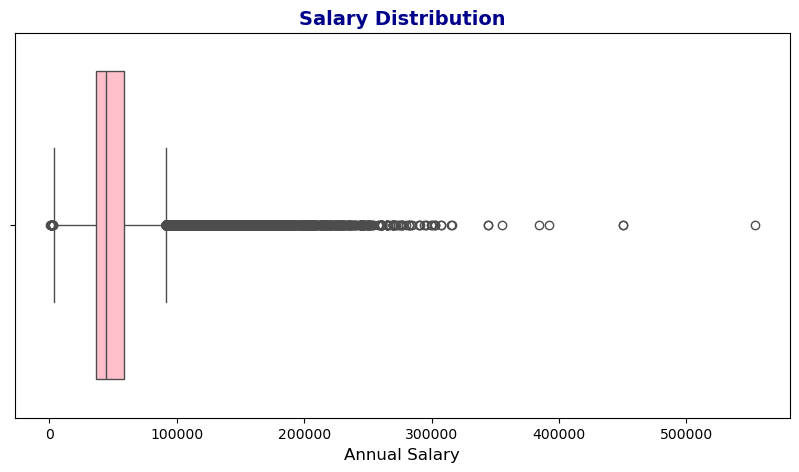

In [236]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="ANNUAL", data=df, color="cyan", boxprops=dict(facecolor="pink"))

plt.title("Salary Distribution", fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel("Annual Salary", fontsize=12, color='black')
plt.show()

### 📊 Insights from the Salary Box Plot

The box plot above shows how salaries are spread in our dataset.

#### 🔍 What We Can Understand:

- Most salary values are **grouped on the left side** (closer to ₹0–₹100,000).
- The **pink box** in the middle shows the **middle 50%** of the salary data.
- The **horizontal line inside the box** is the **median salary**.
- The **whiskers** show the general range of the data, excluding extreme values.
- The **small circles on the right** are **outliers** — salaries that are much higher than the rest.

#### Key Insight:
There are many **very high salaries (outliers)** in the dataset that are **far away** from most other values.  
This shows the salary data is **skewed**.

In [241]:
# find the Q1 AND Q3 
q1=df1["ANNUAL"].quantile(0.25)
print("lower limit",q1)
q3=df1["ANNUAL"].quantile(0.75)
print("upper limit",q3)

lower limit 36238.08
upper limit 58389.72



### What is the IQR Method?

* **IQR** stands for **Interquartile Range**.
* It helps us **find outliers** — values that are too high or too low compared to most of the data.

### Why Are We Using the IQR Method?

Sometimes data contains **very high or very low values** that do not follow the normal pattern.  
These are called **outliers**, and they can affect the performance of our model.

To find these outliers, we use the **IQR (Interquartile Range) Method**.

---

### What Is IQR?

IQR means the **range between the middle 50% of the data**.

It is calculated like this:

\[
\text{IQR} = Q3 - Q1
\]

- **Q1** = 25th percentile (first quartile)
- **Q3** = 75th percentile (third quartile)

---

### How Does IQR Help Us Find Outliers?

Any value that falls **outside this range** is considered an outlier:

- **Lower limit** = Q1 - 1.5 × IQR  
- **Upper limit** = Q3 + 1.5 × IQR

If a value is **less than the lower limit** or **greater than the upper limit**, we mark it as an outlier.

---

### Why This Matters in Our Project

We are predicting **salaries** in the Texas Bank dataset.  
Box plots and the IQR method help us:

- Find and remove extreme salary values
- Improve model accuracy
- Understand the salary distribution better

Sure, Ranith! Here's a **short and simple explanation** of the **IQR method**:

---

In [244]:
# Find the IQR
IQR=q3-q1
IQR

22151.64

### ✅ Why Do We Find the Lower and Upper Limits?

 We find the lower and upper limits to **detect which values are outliers** in our dataset using the IQR method.

---

###  Here's Why:

When we calculate:


lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
```

We are setting a **safe range** where most of the data should fall.

* Any value **below the lower limit** is **too small** → an outlier
* Any value **above the upper limit** is **too large** → an outlier

---

In [250]:
## find the lower limit and upper limit
lower_limit=q1-1.5*IQR
print("LOWER LIMIT",lower_limit)
upper_limit=q3+1.5*IQR
print("UPPER_LIMIT",upper_limit)

LOWER LIMIT 3010.6200000000026
UPPER_LIMIT 91617.18


In [252]:
## FIND THE VALUE OF UPPER LIMIT
upper=df1.loc[df1["ANNUAL"]>upper_limit]
upper

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.9615,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.9615,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
5,302,OFFICE OF THE ATTORNEY GENERAL ...,ROGERS,SHAUNA,,1623,DIRECTOR IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0000,40.0,12899.00,154788.00,1177785,True,1.0,NaN,NaN,NaN
7,510,TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL ...,SPINKS,DARREL,D,1623,DIRECTOR IV ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0000,40.0,10000.00,120000.00,147334,True,NaN,NaN,171383.40,NaN
36,101,SENATE ...,BARNETT,ANNA,P,7101,LEG. OFFICIAL/ADMINISTRATOR ...,WHITE,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,...,0.0000,40.0,8000.00,96000.00,49800,True,NaN,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149374,809,STATE PRESERVATION BOARD ...,KOCH,MARGARET,M,1623,DIRECTOR IV ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0000,40.0,10583.34,127000.08,336971,NaN,NaN,NaN,NaN,NaN
149393,809,STATE PRESERVATION BOARD ...,MEDINA,JOE,,1603,MGR IV ...,HISPANIC,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0000,40.0,8358.41,100300.92,9905,NaN,NaN,NaN,NaN,NaN
149401,809,STATE PRESERVATION BOARD ...,NUNN,CHRISTOPHER,L,1602,MGR III ...,BLACK,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0000,40.0,7916.67,95000.04,38235,NaN,NaN,NaN,NaN,NaN
149415,809,STATE PRESERVATION BOARD ...,PROVINE,CYNTHIA,R,1622,DIRECTOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0000,40.0,10188.09,122257.08,52817,NaN,NaN,NaN,NaN,NaN


##  What departments/roles have the biggest wage disparities between managers and employees?

In [257]:
df1.loc[df1["ANNUAL"]>=500000]

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
83851,542,CANCER PREVENTION AND RESEARCH INSTITUTE OF TE...,WILLSON,JAMES,,C542,CHIEF SCIENTIFIC OFFICER ...,WHITE,MALE,ERF - EXEMPT REGULAR FULL-TIME,...,0.0,40.0,46125.0,553500.0,372291,NaN,NaN,NaN,NaN,NaN


In [259]:
df1.loc[df1["ANNUAL"]<=1000]

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
142067,102,HOUSE OF REPRESENTATIVES ...,HOUSTON,DONTE,D,7110,ELECTED OFFICIALS STAFF ...,BLACK,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,0.0,10.0,50.0,600.0,851628,NaN,NaN,NaN,NaN,NaN


- ***CANCER PREVENTION AND RESEARCH INSTITUTE OF TEXAS agency  is paying highest salary of $553500.0 to CHIEF SCIENTIFIC OFFICER.***

- ***HOUSE OF REPRESENTATIVES  agency is paying lowest salary of $600.0 to ELECTED OFFICIALS STAFF.*** 

 ## Model Comparison Report

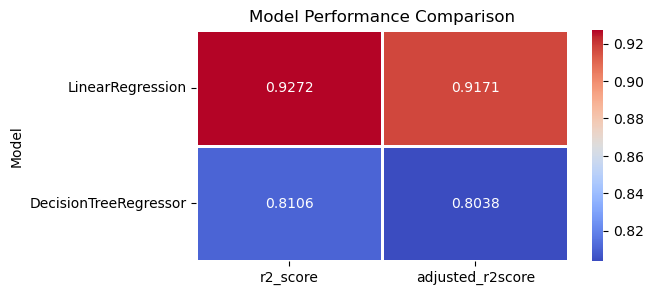

In [286]:
models = pd.DataFrame({
    'Model': ['LinearRegression', 'DecisionTreeRegressor'],  
    'r2_score': [linearpred1,decisionr2], 
    'adjusted_r2score': [adj_r2_1,adj_r2]  
})
plt.figure(figsize=(6, 3))
sns.heatmap(models.set_index('Model'), annot=True, cmap='coolwarm', linewidths=1, fmt=".4f")
plt.title("Model Performance Comparison")
plt.show()

# Final Conclusion

- ***In this project, we analyzed and modeled payroll data from the Texas state employee dataset to support the government's understanding of salary structures, compensation trends, and forecasting future payroll needs.***
- ***Among the different regression models applied (Linear Regression, Decision Tree,) the best-performing model was selected based on metrics such as **R² score**, **Adjusted R²**, and **RMSE**.***
- ***This model can now be deployed to predict employee salaries for new records, assisting payroll planning and budget allocation.***

# Report on Challenges

### Converting Categorical Columns

- **Challenge**: Machine learning models cannot directly interpret categorical (text-based) variables such as `AGENCY_NAME`, `GENDER`, `CLASS_TITLE`, etc.
- **Why It’s Important**: Converting categorical columns into numerical format is essential for enabling the model to process and analyze the data effectively.